In [49]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier

In [50]:
df = pd.read_csv("sdss_100k_galaxy_form_burst.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [52]:
df.head(10)

objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   
5  1237648702973149360   332153425083000832  198.720675 -1.083876    19.47473   
6  1237648702973214878   332154524594628608  198.866046 -1.084422    20.24418   
7  1237648702973280444   332155898984163328  198.968407 -1.105446    18.46020   
8  1237648702974722250   334395878611642368  202.309128 -1.252907    18.70091   
9  1237648702974722271   334396703245363200  202.253339 -1.117378    19.88486   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   
5    18.18575  17.52763  17.14837  16.89580    16.220930  ...  18.23220   
6    18.62780  17.76331  17.26417  16.97725     7.983503  ...  18.07458   
7    17.27620  16.65430  16.25241  16.04085    41.296720  ...  17.66161   
8    17.50793  17.04285  16.71619  16.54133    33.084900  ...  18.84762   
9    18.45146  17.46034  16.99177  16.73163    11.117010  ...  18.83566   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   class  \
0     0.099951     0.311864  0.289370  0.270588  0.187182  GALAXY   
1     0.366549     0.516876  0.517447  0.552297  0.636966  GALAXY   
2     0.050000     0.417137  0.506950  0.549881  0.370166  GALAXY   
3     0.310763     0.356827  0.389345  0.388160  0.416660  GALAXY   
4 -9999.000000 -9999.000000  0.050000  0.050000  0.149973  GALAXY   
5     0.754158     0.767767  0.759105  0.742471  0.721491  GALAXY   
6     0.273089     0.313715  0.309011  0.292027  0.299998  GALAXY   
7     0.849475     0.902072  0.887647  0.868890  0.830413  GALAXY   
8     0.419439     0.486001  0.518854  0.529878  0.622219  GALAXY   
9     0.699929     0.840616  0.832805  0.817713  0.743459  GALAXY   

      subclass  redshift  redshift_err  
0  STARFORMING  0.067749      0.000015  
1  STARFORMING  0.105118      0.000010  
2  STARFORMING  0.234089      0.000030  
3  STARFORMING  0.110825      0.000030  
4  STARFORMING  0.136658      0.000021  
5  STARFORMING  0.111458      0.000011  
6  STARFORMING  0.112151      0.000014  
7  STARFORMING  0.110480      0.000009  
8  STARFORMING  0.084629      0.000009  
9  STARFORMING  0.237549      0.000035  

[10 rows x 43 columns]

In [53]:
df.isna().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [54]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


In [55]:
print(df[df.isna().any(axis=1)])


Empty DataFrame
Columns: [objid, specobjid, ra, dec, u, g, r, i, z, modelFlux_u, modelFlux_g, modelFlux_r, modelFlux_i, modelFlux_z, petroRad_u, petroRad_g, petroRad_i, petroRad_r, petroRad_z, petroFlux_u, petroFlux_g, petroFlux_i, petroFlux_r, petroFlux_z, petroR50_u, petroR50_g, petroR50_i, petroR50_r, petroR50_z, psfMag_u, psfMag_r, psfMag_g, psfMag_i, psfMag_z, expAB_u, expAB_g, expAB_r, expAB_i, expAB_z, class, subclass, redshift, redshift_err]
Index: []

[0 rows x 43 columns]


In [56]:
df.duplicated().any()

False

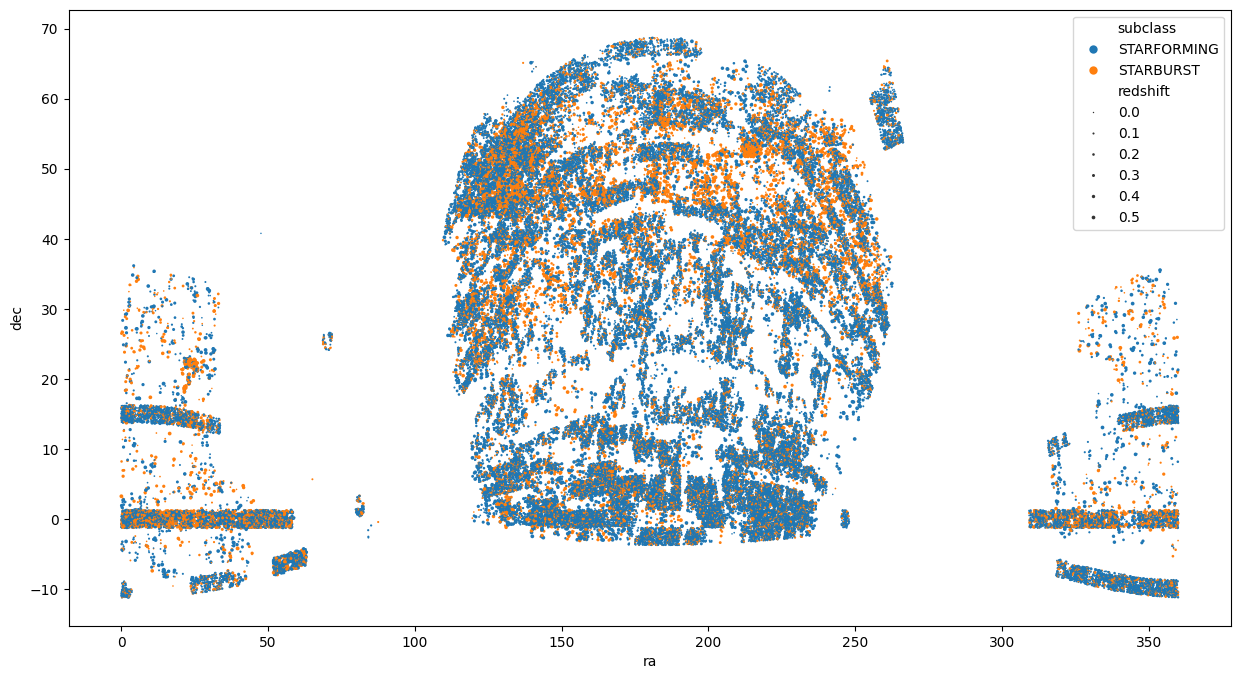

In [57]:
# make a scatterplot using the ra/dec data with subclass and redshift
plt.figure(figsize=(15, 8))
sns.scatterplot(x='ra', y='dec',
                hue='subclass', size='redshift',
                sizes=(1, 8), linewidth=0,
                data=df);


In [58]:
# droping some of the rows we are not going to use - ids and location data
df.drop(columns=['objid', 'specobjid', 'ra', 'dec', 'class'], inplace=True)

In [59]:
# We transformed the 'subclass' column from object to integer datatype using
# ordinal encoding to represent object as integers in the dataset.
# oridinal encoding - replacing subclass with a 0/1 for classification
# starforming =0, starburst = 1
df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)

<ipython-input-59-792baf8639fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)
<ipython-input-59-792baf8639fa>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplac

In [60]:
# here on we will start EDA process
df.describe()

u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       18.518622      17.258221      16.821739      16.362611   
std       105.082004     105.069066      95.035474     100.171155   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%        18.762215      17.505868      16.898845      16.527097   
50%        19.349715      18.072640      17.459080      17.091385   
75%        20.079470      18.656182      17.926918      17.592650   
max        30.960000      30.420980      31.173560      30.562360   

                   z    modelFlux_u    modelFlux_g    modelFlux_r  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       15.850865      30.683321      98.845058     175.621855   
std       114.206165      76.552859     229.479215     435.852215   
min     -9999.000000     -47.451720     -11.935840     -42.440640   
25%        16.281327       9.288132      34.462902      67.453910   
50%        16.861105      18.195690      59.005915     103.828850   
75%        17.453848      31.259628      99.438015     173.929225   
max        28.553240    7915.306000   18668.400000   31755.990000   

         modelFlux_i    modelFlux_z  ...       psfMag_i       psfMag_z  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean      244.728134     307.474895  ...      18.020203      17.435735   
std       619.825871     809.166087  ...     100.181687     114.218604   
min       -54.385510    -144.460200  ...   -9999.000000   -9999.000000   
25%        91.777325     104.256550  ...      18.295627      17.991602   
50%       145.664550     180.086150  ...      18.845780      18.563315   
75%       244.944825     307.044675  ...      19.586577      19.299430   
max     51923.480000   79058.460000  ...      25.966680      27.043280   

             expAB_u        expAB_g        expAB_r        expAB_i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.603667      -0.522111      -0.309462      -0.410153   
std       104.870665     104.871474      94.860919      99.991654   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%         0.299999       0.398705       0.418789       0.418656   
50%         0.508688       0.588335       0.604795       0.604254   
75%         0.699907       0.768804       0.773924       0.773119   
max         1.000000       1.000000       0.999999       1.000000   

             expAB_z       subclass       redshift   redshift_err  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       -0.740964       0.250070       0.116753       0.000179  
std       114.005927       0.433055       0.100169       0.052189  
min     -9999.000000       0.000000      -0.000833       0.000002  
25%         0.381288       0.000000       0.055836       0.000008  
50%         0.575397       0.000000       0.085850       0.000011  
75%         0.752311       1.000000       0.135148       0.000015  
max         0.999998       1.000000       0.572899      16.503710  

[8 rows x 38 columns]

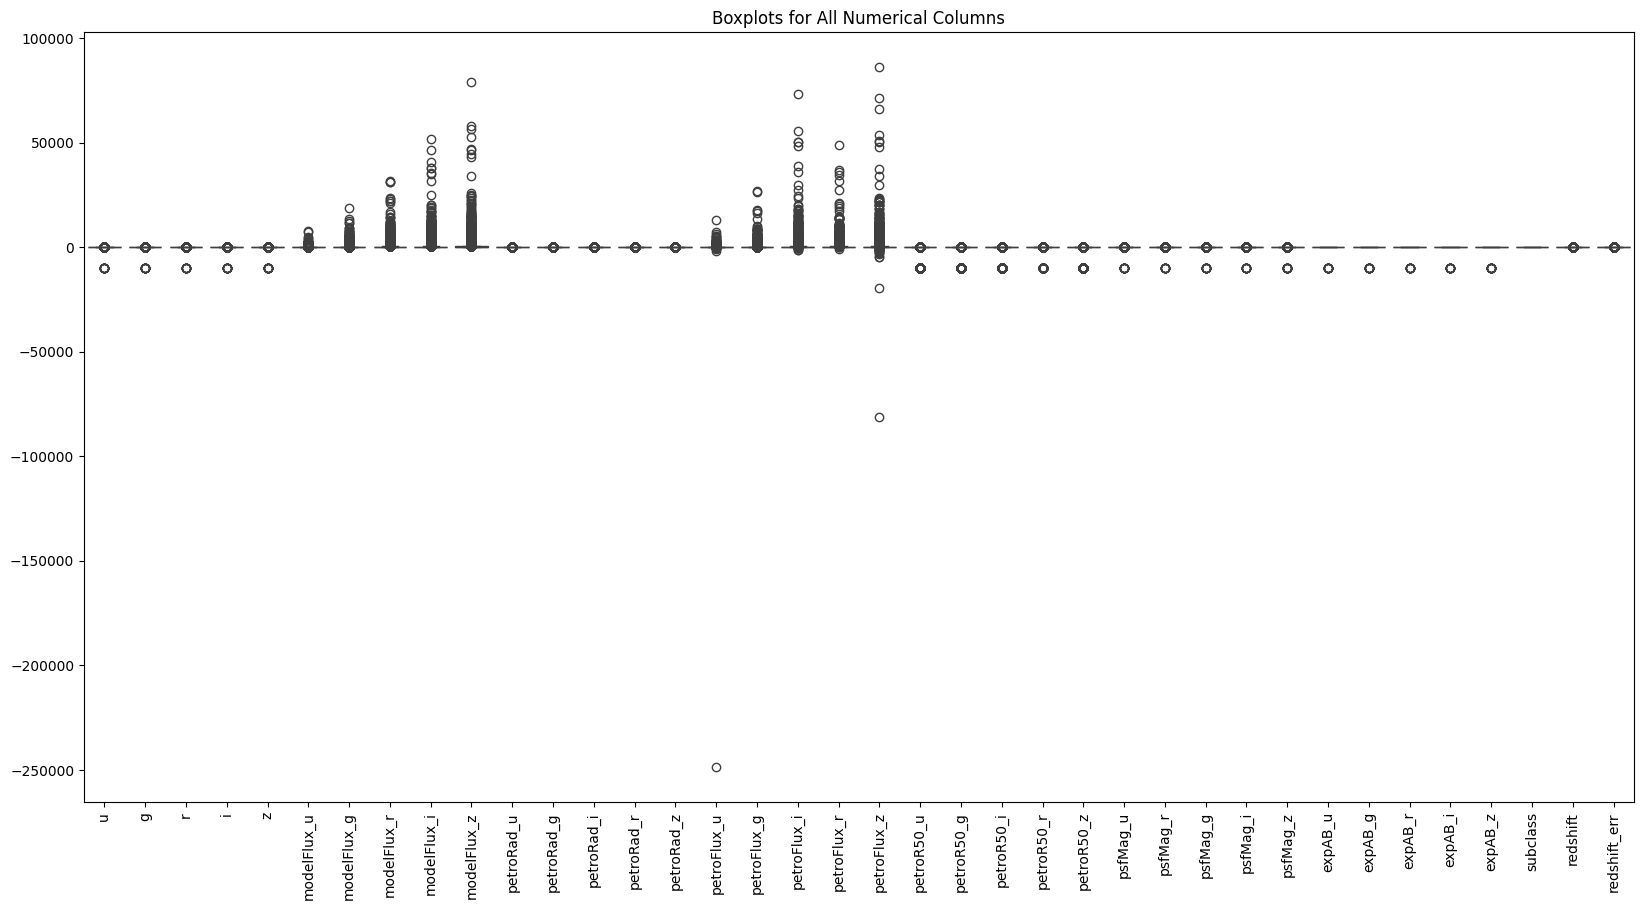

In [61]:
# outlier removal
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Setting figure size
plt.figure(figsize=(20, 10))

# Creating a boxplot for all numerical columns
sns.boxplot(data=df[numerical_cols])

# Rotating column names for readability
plt.xticks(rotation=90)
plt.title("Boxplots for All Numerical Columns")
plt.show()


In [62]:
# Check the number of outliers by z-score
from scipy import stats
numeric_cols = df.columns

for col in numeric_cols:
    print('Outliers in column: ', col)
    counter = 0
    for item in stats.zscore(df.loc[::, col]):
        if (item > 3) or (item < -3):
            counter += 1
    print("total outliers: ", counter)

# Replace outliers with mean
for col in numeric_cols:
    z_score = stats.zscore(df[col])
    # make an index of vars outside 3 and -3
    outlier_index = (z_score > 3) | (z_score < -3)
    # calculate mean without the outliers
    mean_without_outliers = df.loc[~outlier_index, col].mean()
    # replace outliers with calculated mean
    df.loc[outlier_index, col] = mean_without_outliers

Outliers in column:  u
total outliers:  11
Outliers in column:  g
total outliers:  11
Outliers in column:  r
total outliers:  9
Outliers in column:  i
total outliers:  10
Outliers in column:  z
total outliers:  13
Outliers in column:  modelFlux_u
total outliers:  896
Outliers in column:  modelFlux_g
total outliers:  982
Outliers in column:  modelFlux_r
total outliers:  902
Outliers in column:  modelFlux_i
total outliers:  855
Outliers in column:  modelFlux_z
total outliers:  815
Outliers in column:  petroRad_u
total outliers:  904
Outliers in column:  petroRad_g
total outliers:  914
Outliers in column:  petroRad_i
total outliers:  1038
Outliers in column:  petroRad_r
total outliers:  1036
Outliers in column:  petroRad_z
total outliers:  1276
Outliers in column:  petroFlux_u
total outliers:  20
Outliers in column:  petroFlux_g
total outliers:  758
Outliers in column:  petroFlux_i
total outliers:  694
Outliers in column:  petroFlux_r
total outliers:  730
Outliers in column:  petroFlux_z


<ipython-input-62-574d5f843c57>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25007' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_index, col] = mean_without_outliers


In [63]:
#Normalize Data for Better Comparison
#Since some features have a large scale,apply log transformation/MinMax scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

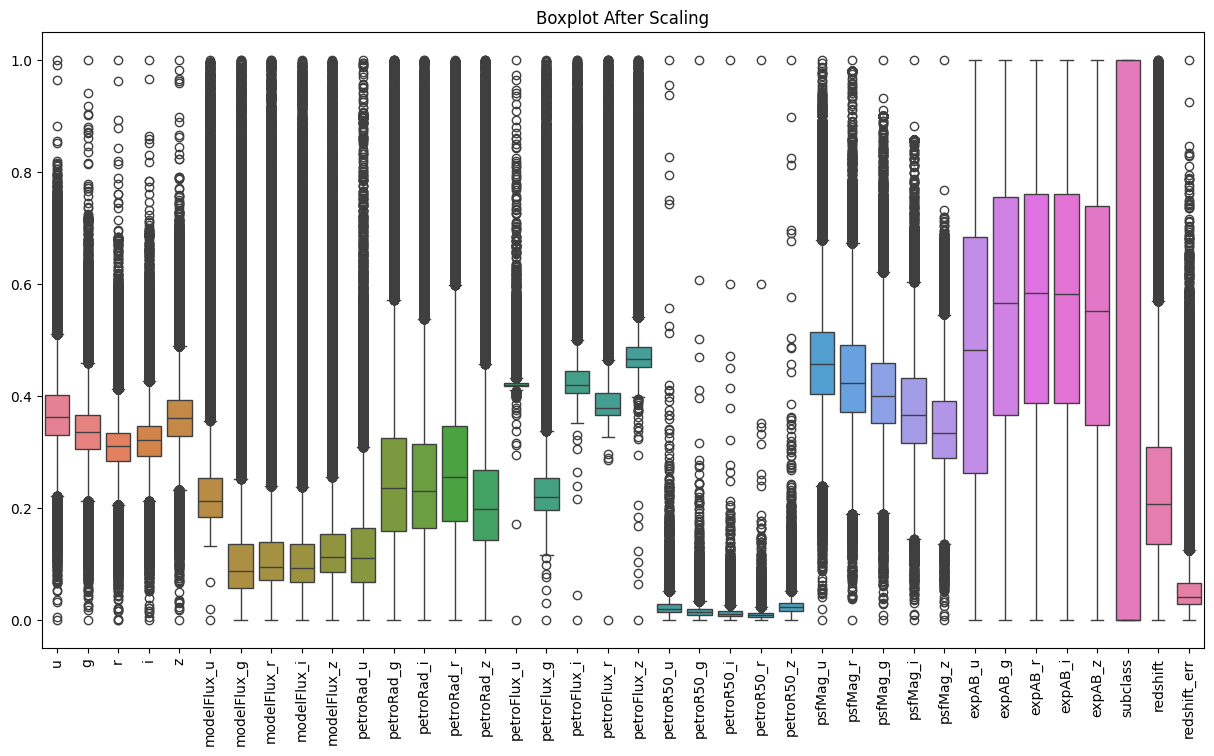

In [64]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot After Scaling")
plt.show()


In [65]:
# using univariate analysis
sub=df['subclass'].value_counts()

sub

subclass
0.0    74993
1.0    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

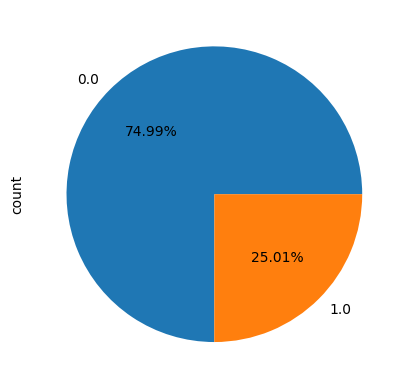

In [66]:
sub.plot(kind='pie',subplots=True,autopct='%1.2f%%')

In [67]:
def func(col):

    sns.boxplot(y=col,data=df_scaled)

    plt.show()

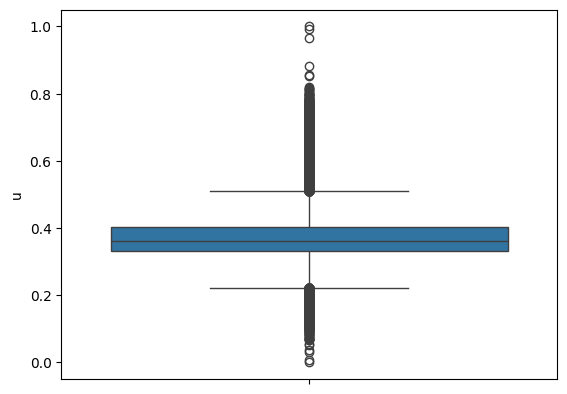

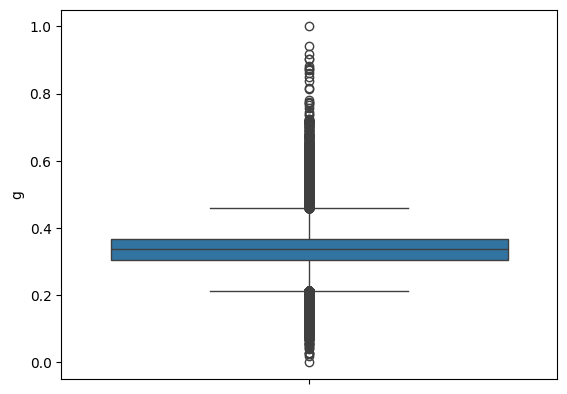

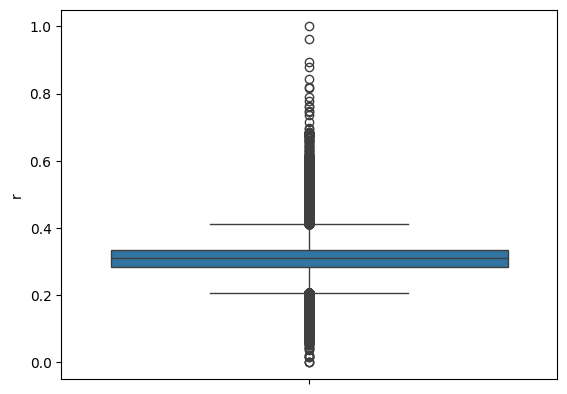

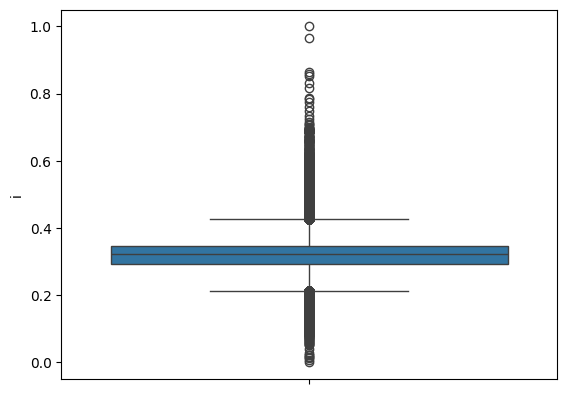

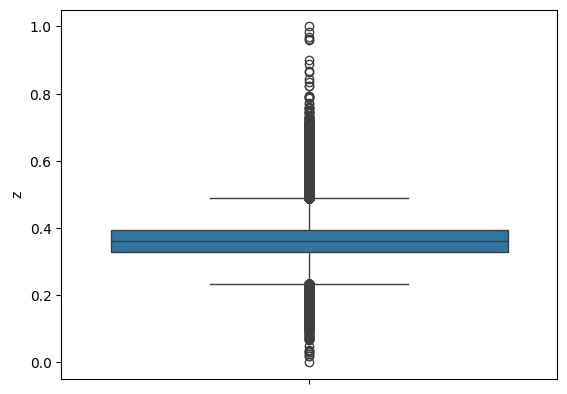

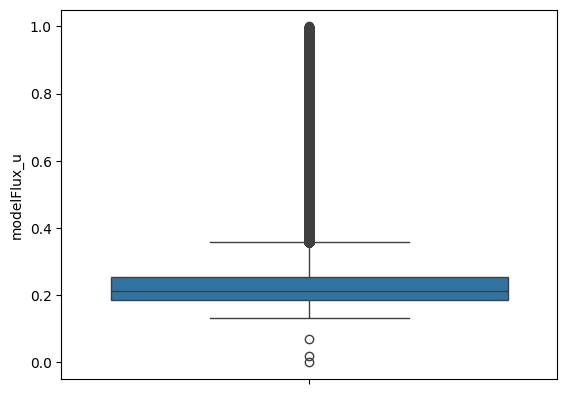

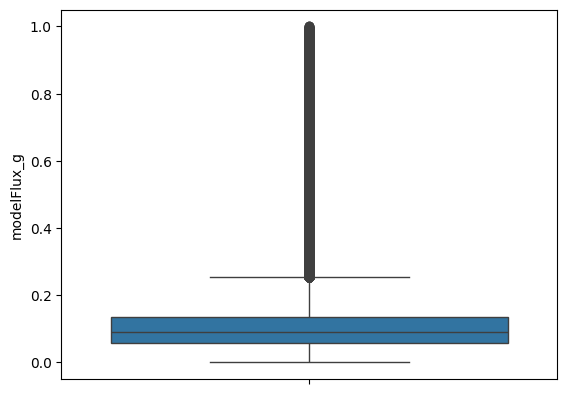

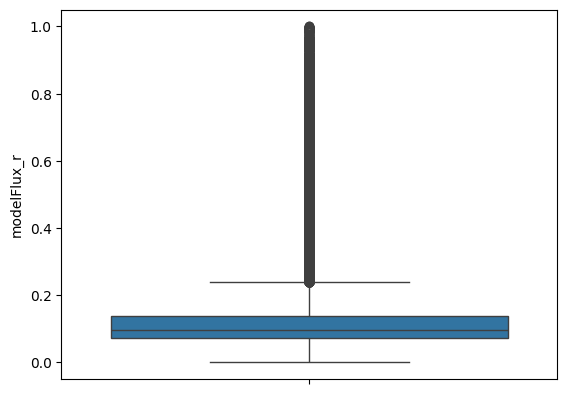

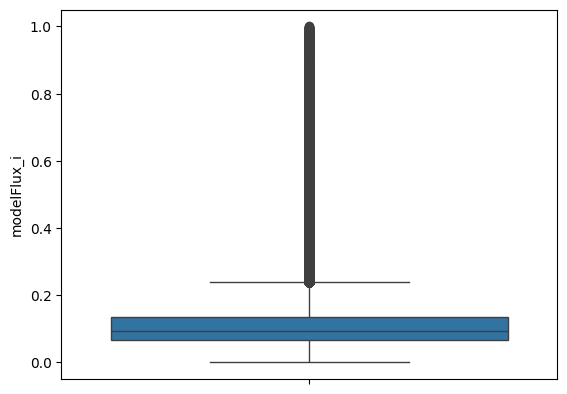

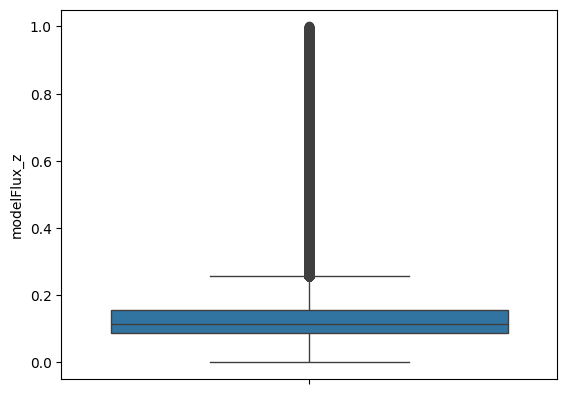

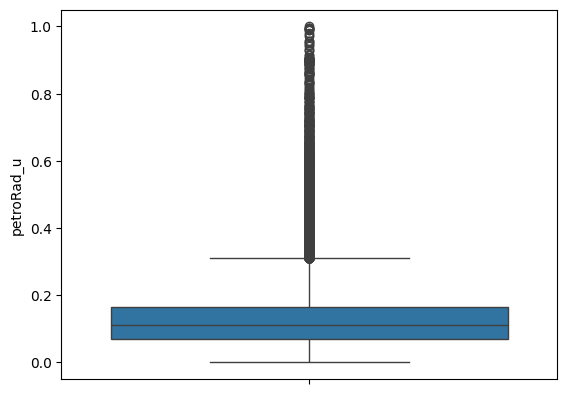

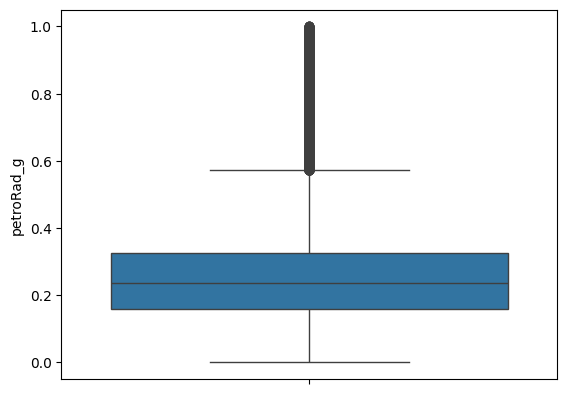

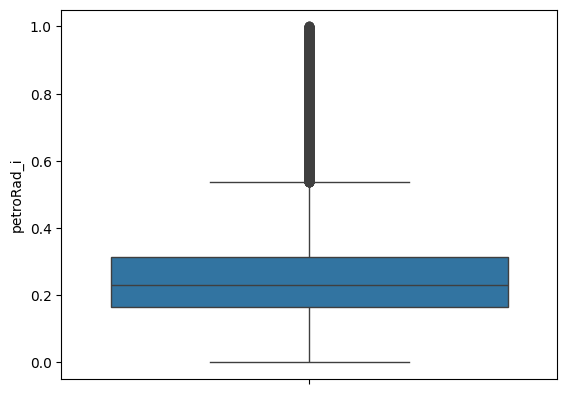

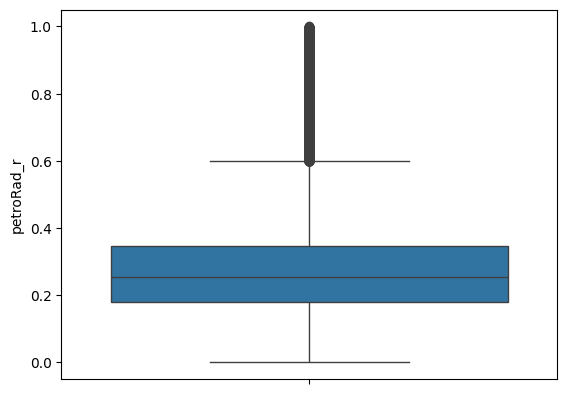

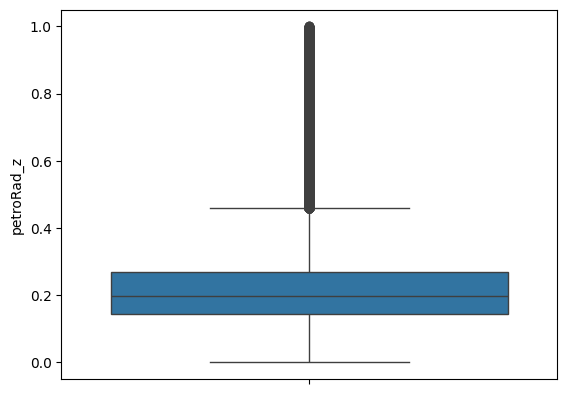

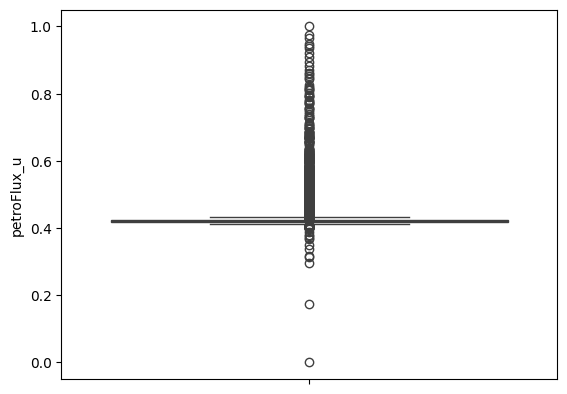

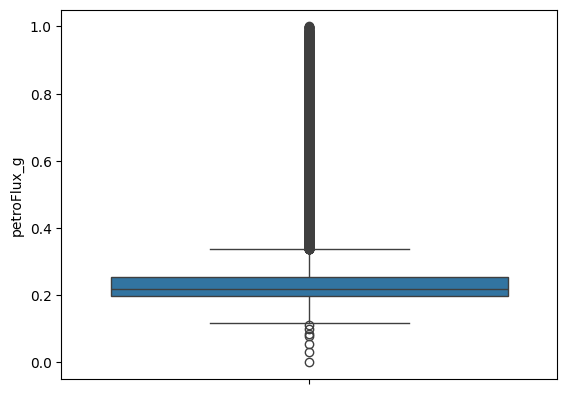

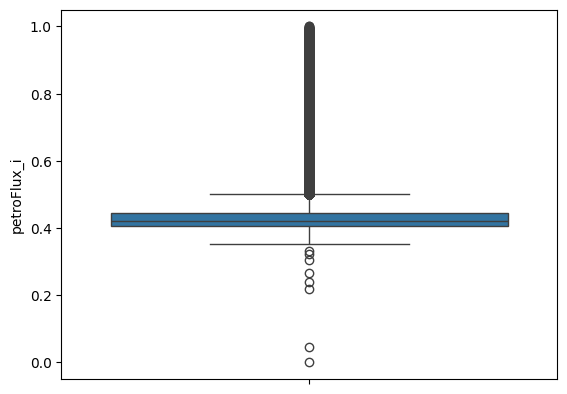

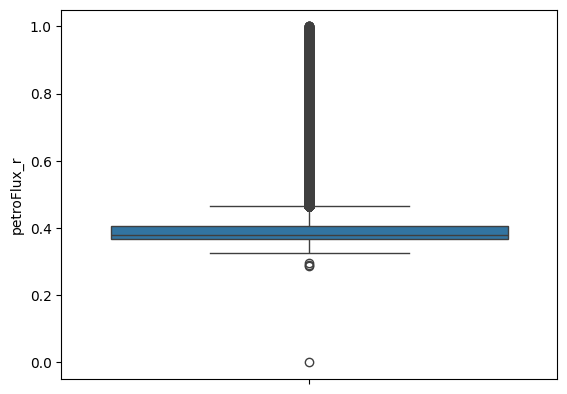

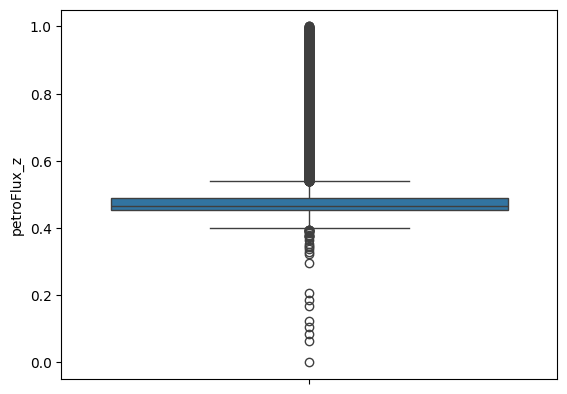

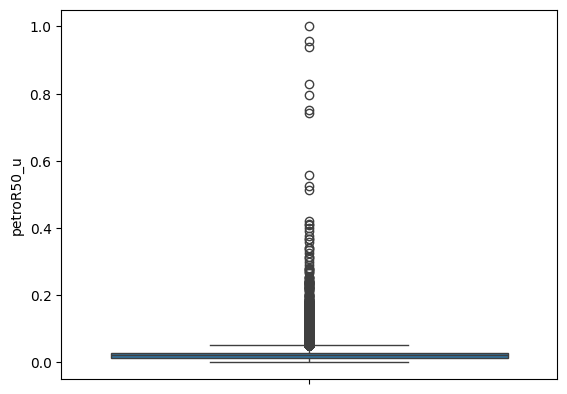

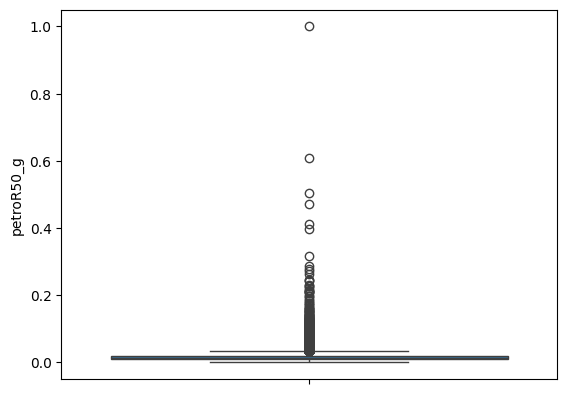

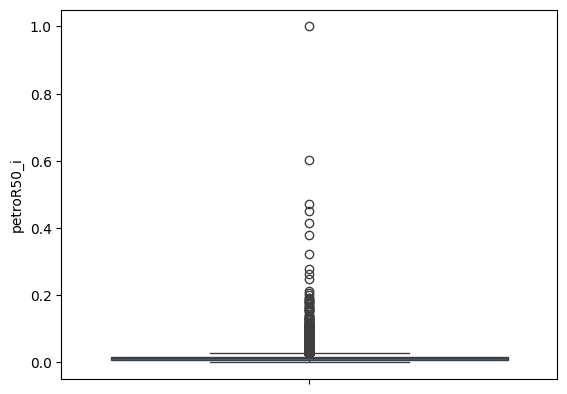

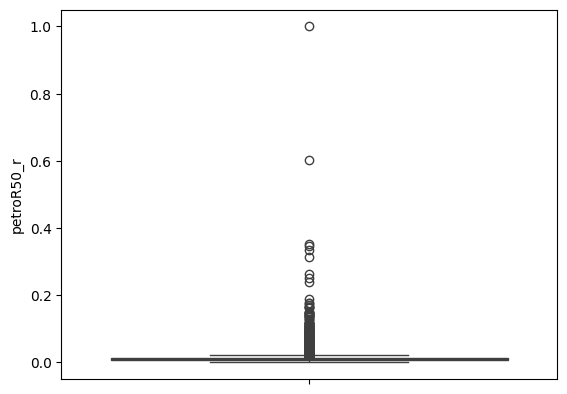

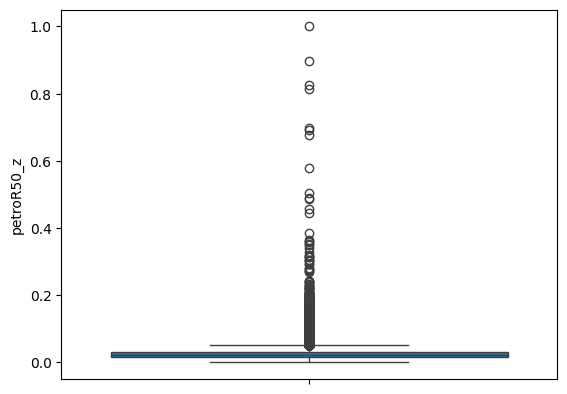

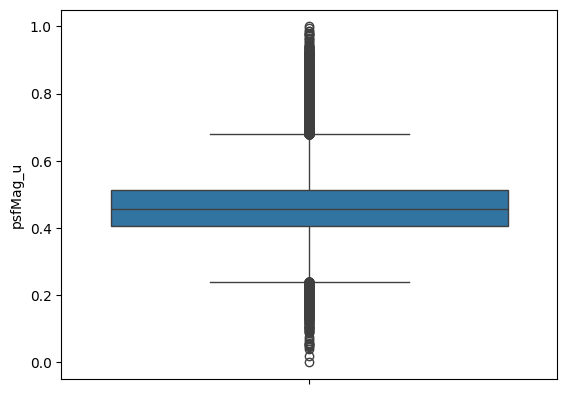

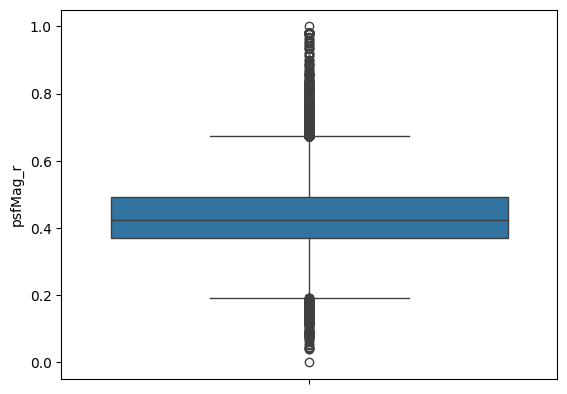

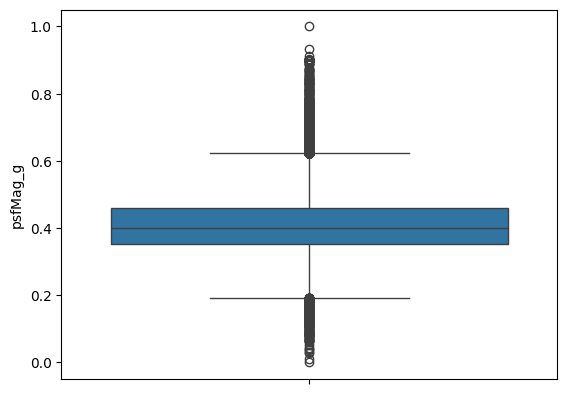

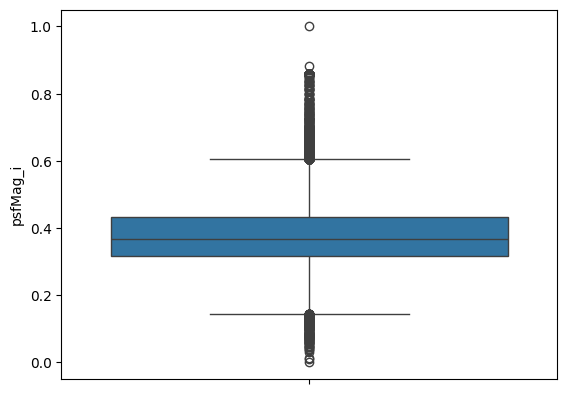

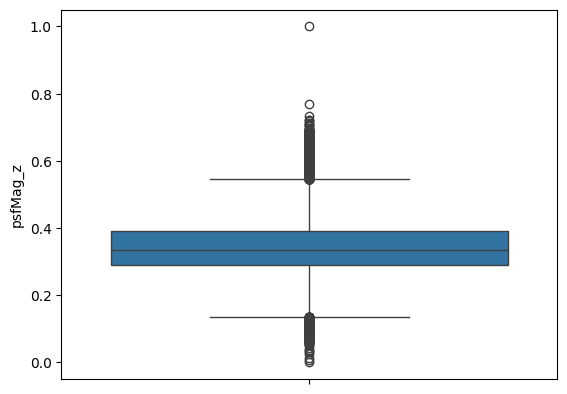

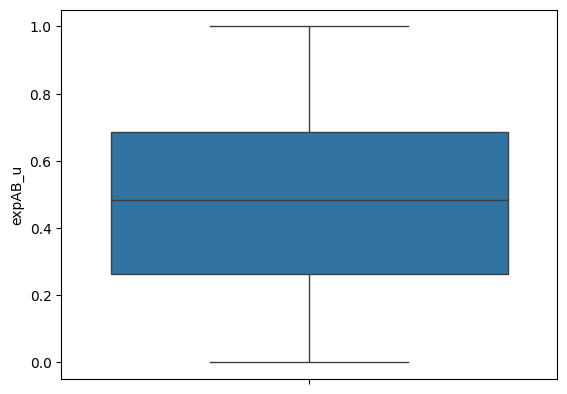

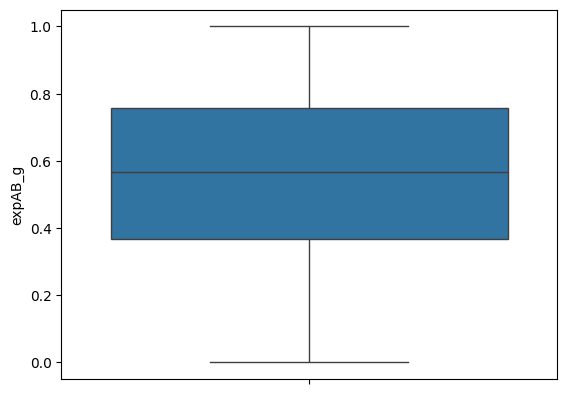

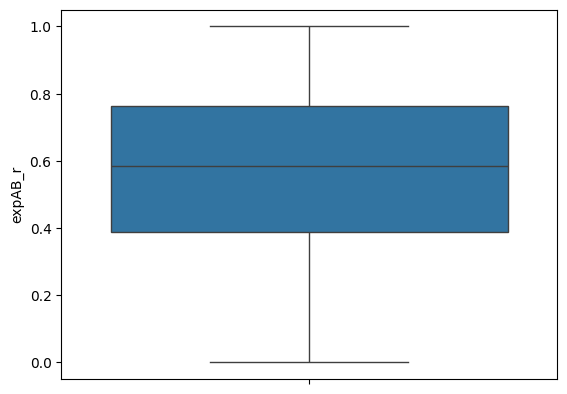

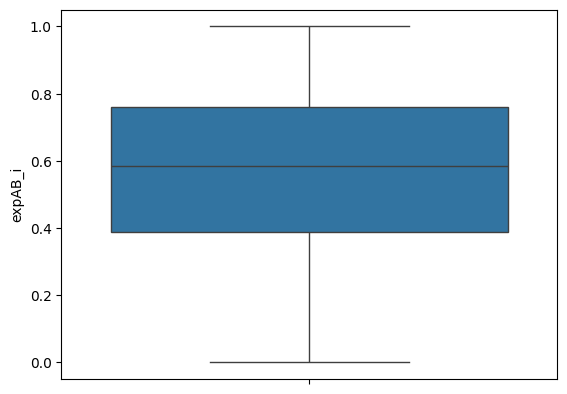

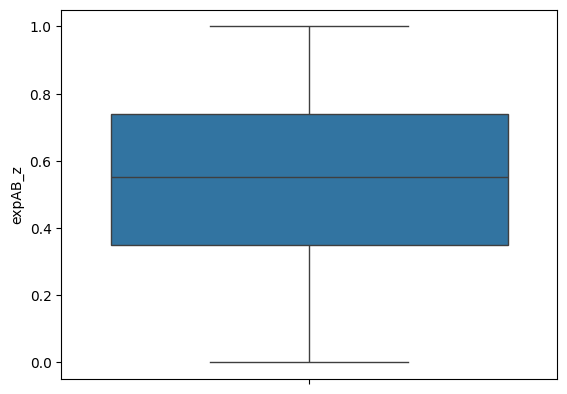

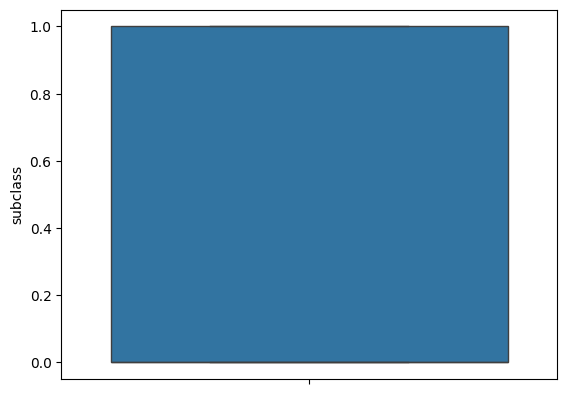

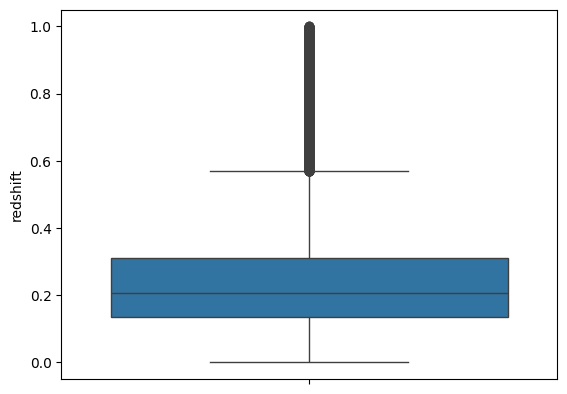

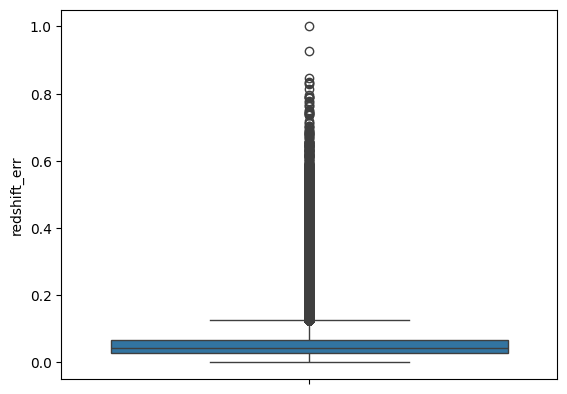

In [68]:
for i  in df_scaled.columns:

    func(i)

<Axes: ylabel='u'>

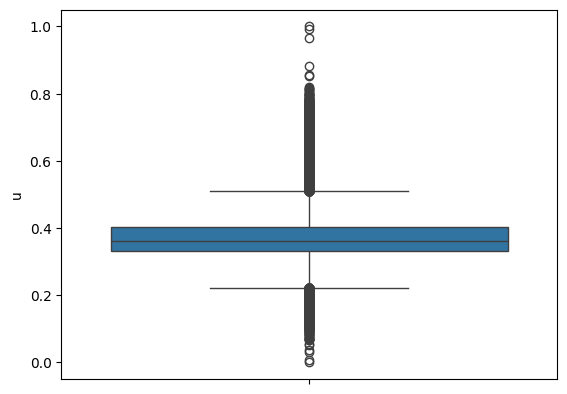

In [69]:
# handelling outlier columnwise
sns.boxplot(y='u',data=df_scaled)


In [70]:
df = df_scaled.copy()

Column: u
Upper Bound for Outliers: 0.5108743354588035
Lower Bound for Outliers: 0.22153286495731916


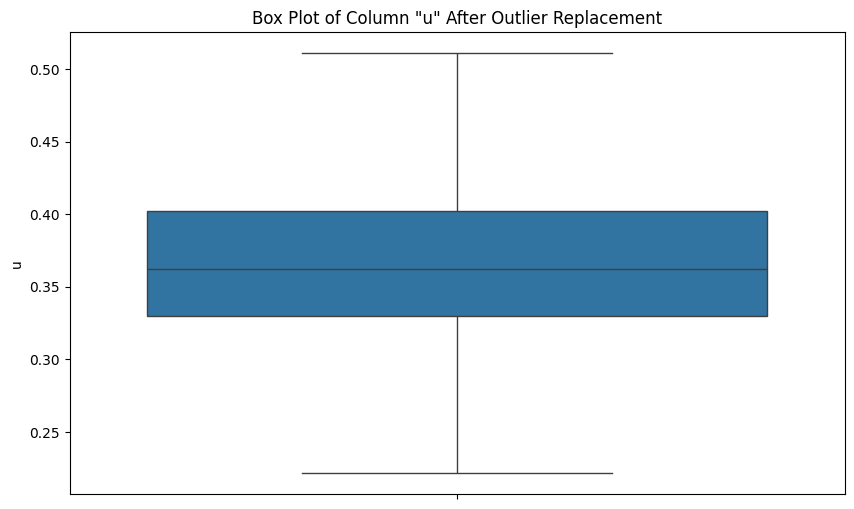

Column: g
Upper Bound for Outliers: 0.4601951071980643
Lower Bound for Outliers: 0.21285214060084673


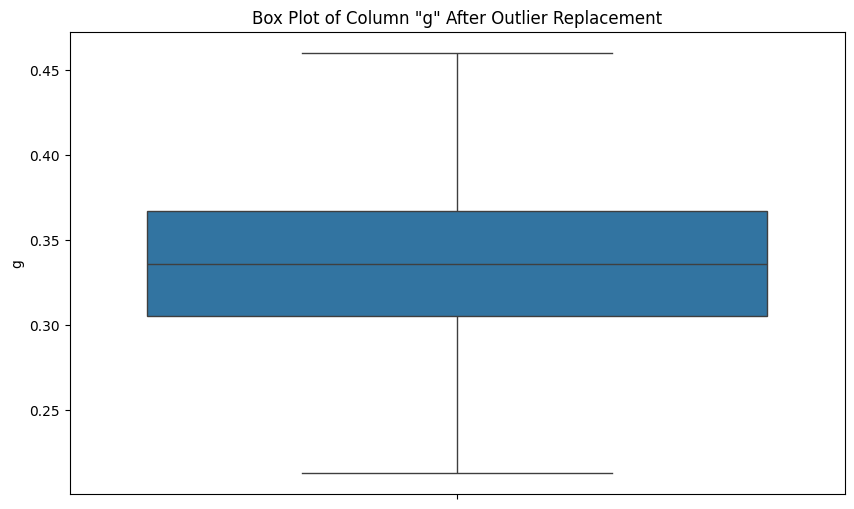

Column: r
Upper Bound for Outliers: 0.4126454853744357
Lower Bound for Outliers: 0.20633450370632048


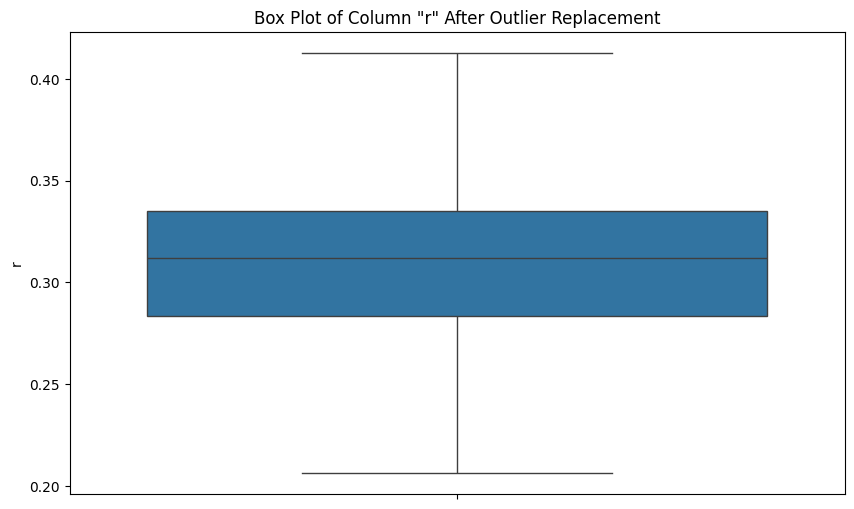

Column: i
Upper Bound for Outliers: 0.4271390983825816
Lower Bound for Outliers: 0.21247337005063274


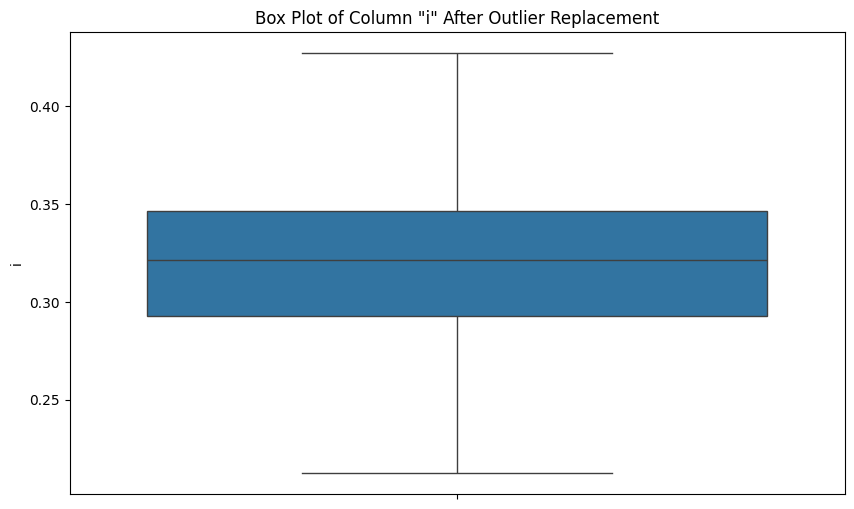

Column: z
Upper Bound for Outliers: 0.4894771919067052
Lower Bound for Outliers: 0.23330647263569843


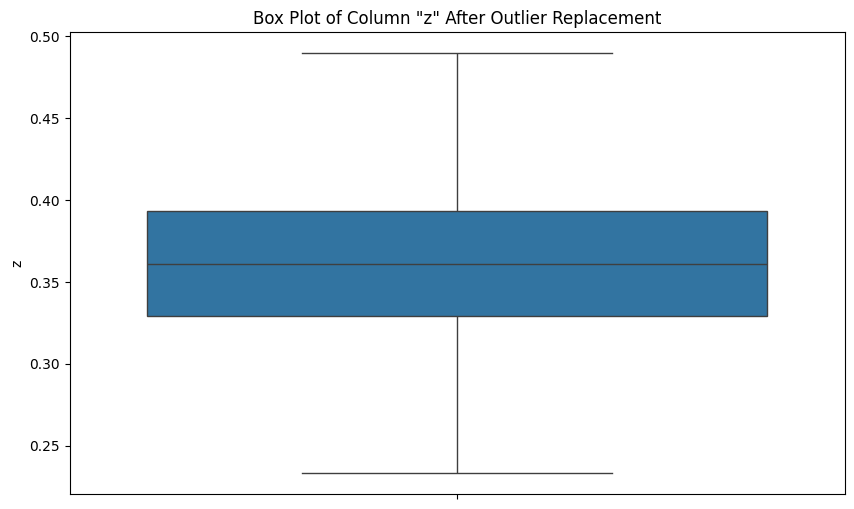

Column: modelFlux_u
Upper Bound for Outliers: 0.3567003670144317
Lower Bound for Outliers: 0.08100484938323856


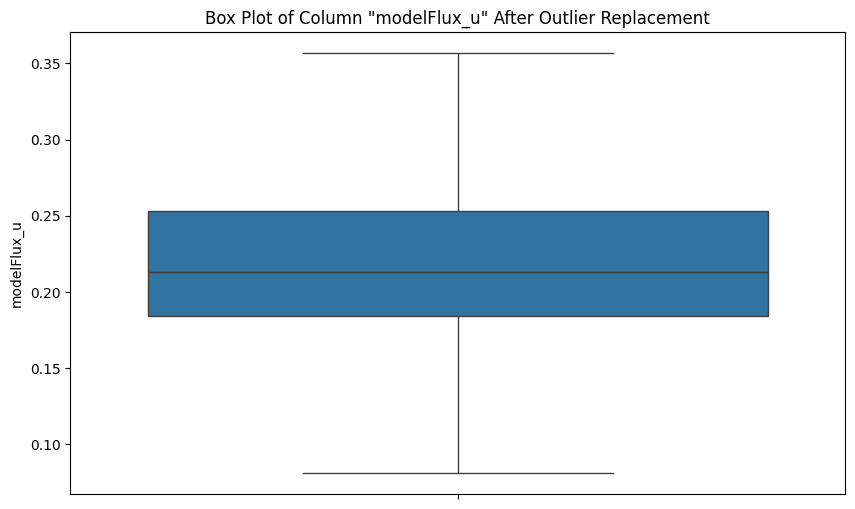

Column: modelFlux_g
Upper Bound for Outliers: 0.25288181376893487
Lower Bound for Outliers: -0.05875113770823485


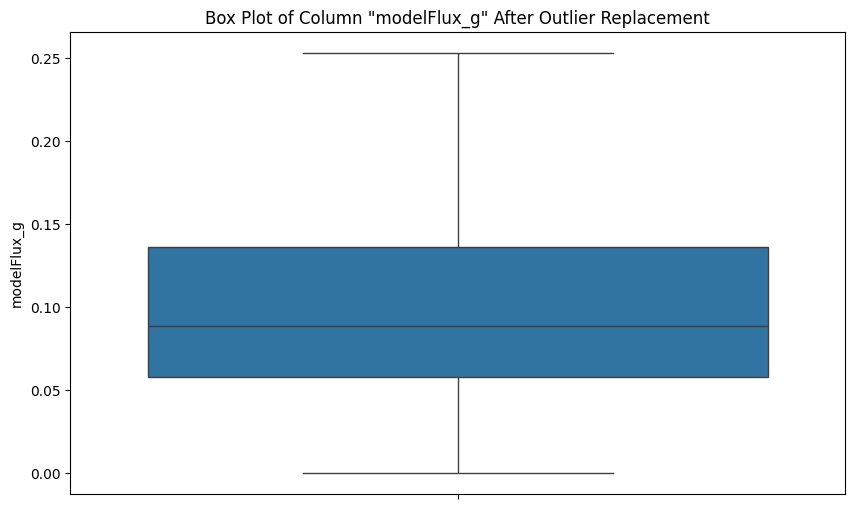

Column: modelFlux_r
Upper Bound for Outliers: 0.23951221974987746
Lower Bound for Outliers: -0.028433502674860445


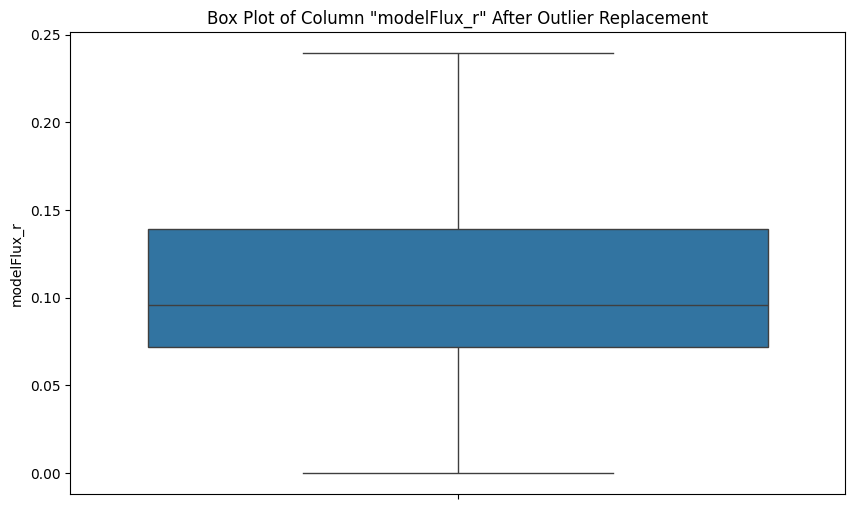

Column: modelFlux_i
Upper Bound for Outliers: 0.23846304602915588
Lower Bound for Outliers: -0.03459508426414651


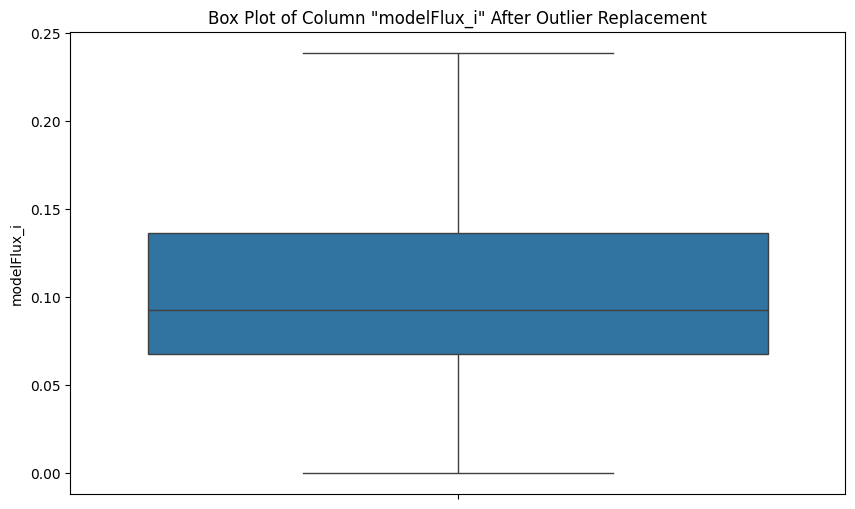

Column: modelFlux_z
Upper Bound for Outliers: 0.25627325652580224
Lower Bound for Outliers: -0.015422654233103975


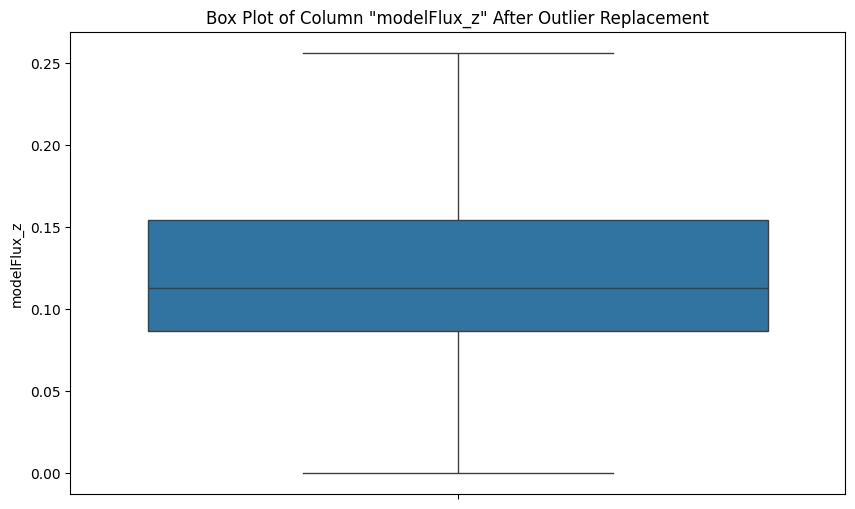

Column: petroRad_u
Upper Bound for Outliers: 0.309340308525593
Lower Bound for Outliers: -0.076585461439477


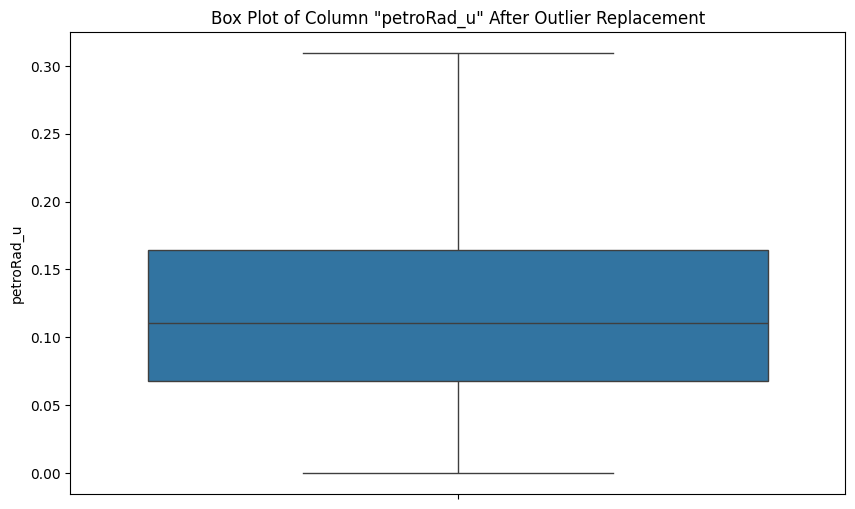

Column: petroRad_g
Upper Bound for Outliers: 0.5722301478595023
Lower Bound for Outliers: -0.08737271935316279


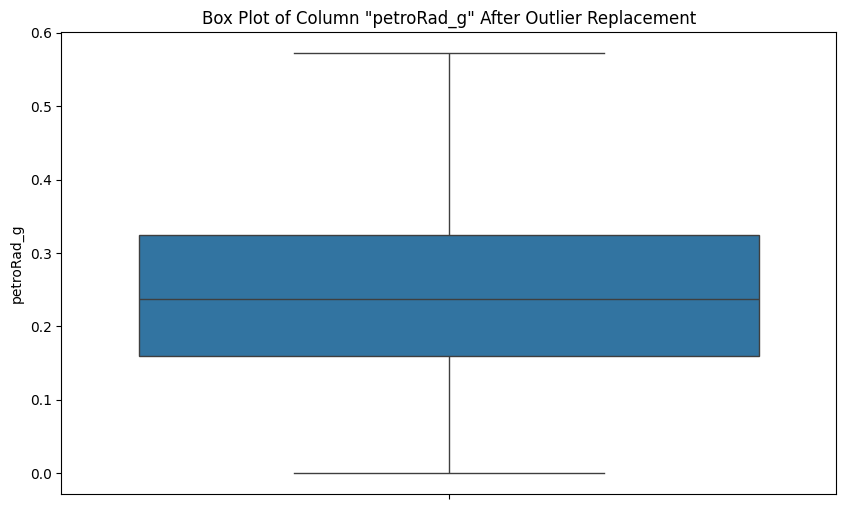

Column: petroRad_i
Upper Bound for Outliers: 0.5378563450492291
Lower Bound for Outliers: -0.05921494027525859


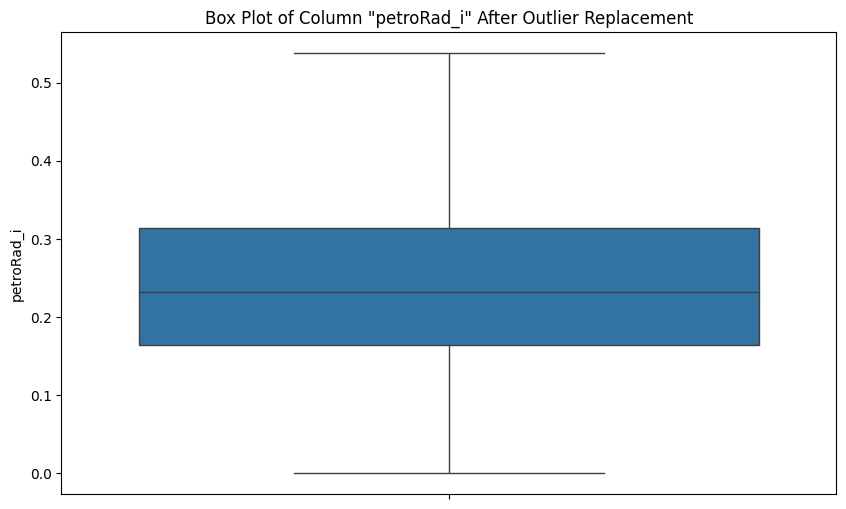

Column: petroRad_r
Upper Bound for Outliers: 0.5985511905889456
Lower Bound for Outliers: -0.07412952748883828


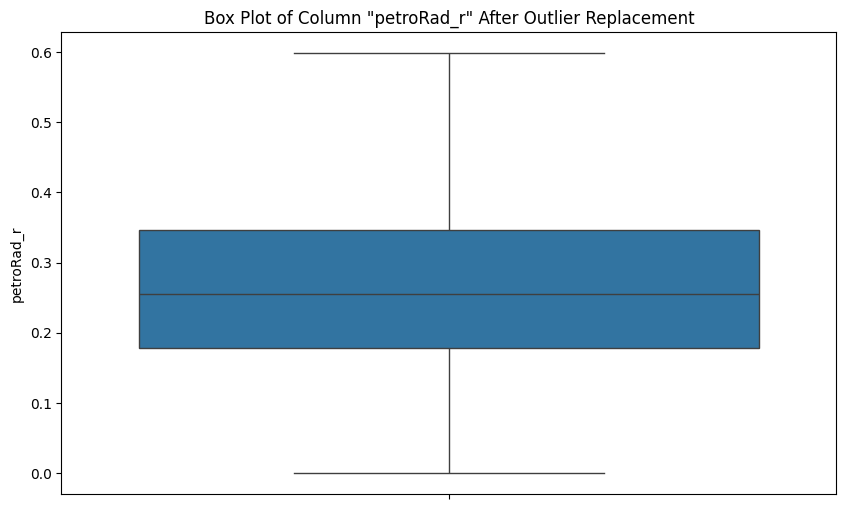

Column: petroRad_z
Upper Bound for Outliers: 0.4581677230592059
Lower Bound for Outliers: -0.04656857161780564


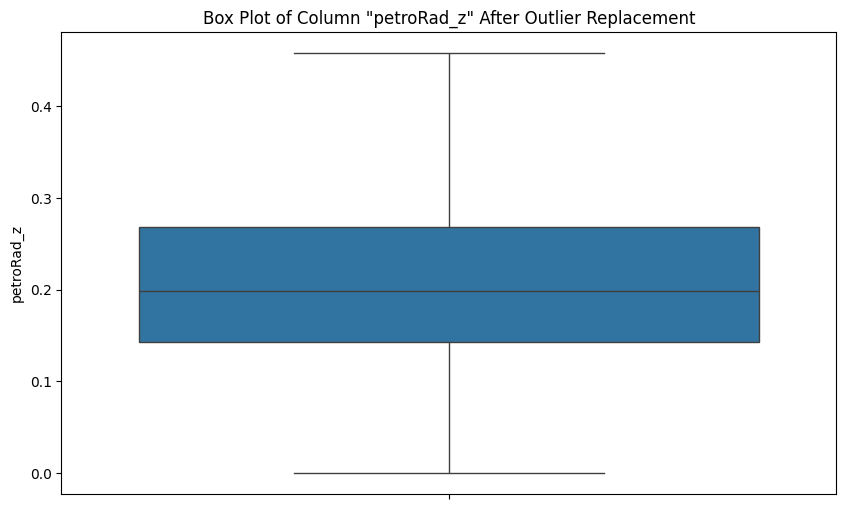

Column: petroFlux_u
Upper Bound for Outliers: 0.43209146125579145
Lower Bound for Outliers: 0.40957863332118116


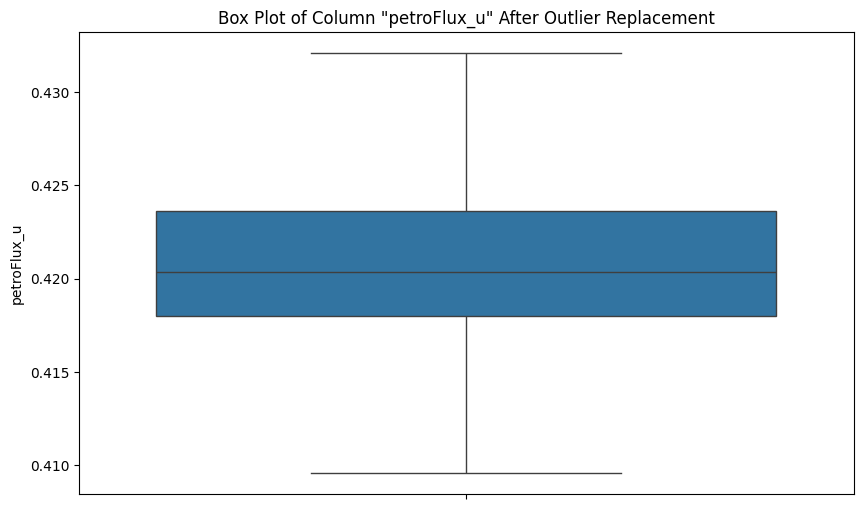

Column: petroFlux_g
Upper Bound for Outliers: 0.33863914801824146
Lower Bound for Outliers: 0.112702273428392


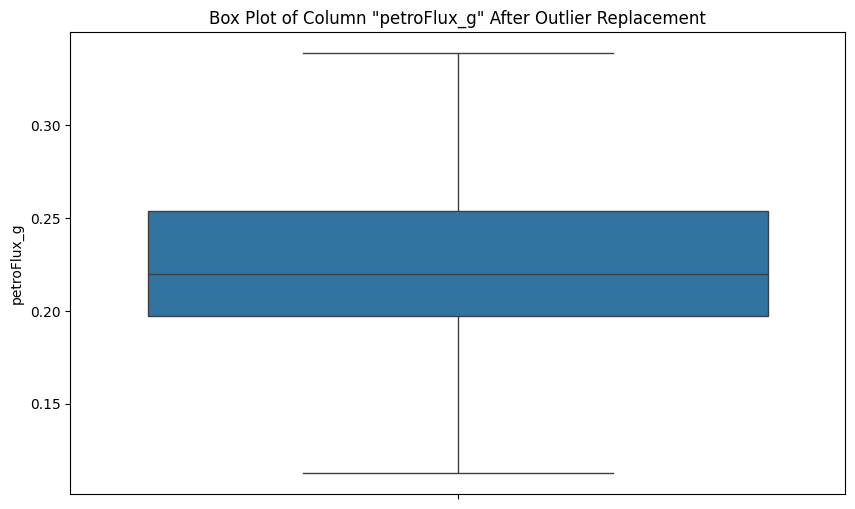

Column: petroFlux_i
Upper Bound for Outliers: 0.5008235804982479
Lower Bound for Outliers: 0.35015401434570254


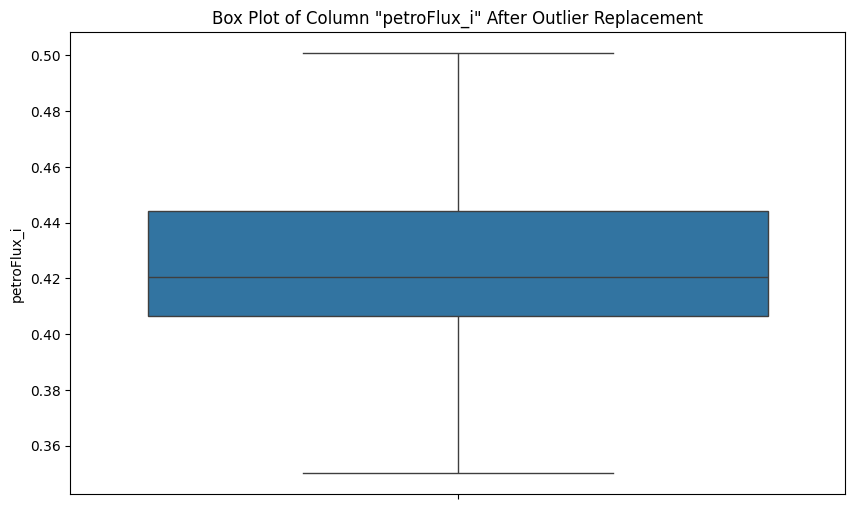

Column: petroFlux_r
Upper Bound for Outliers: 0.46522316273351244
Lower Bound for Outliers: 0.30621392433042877


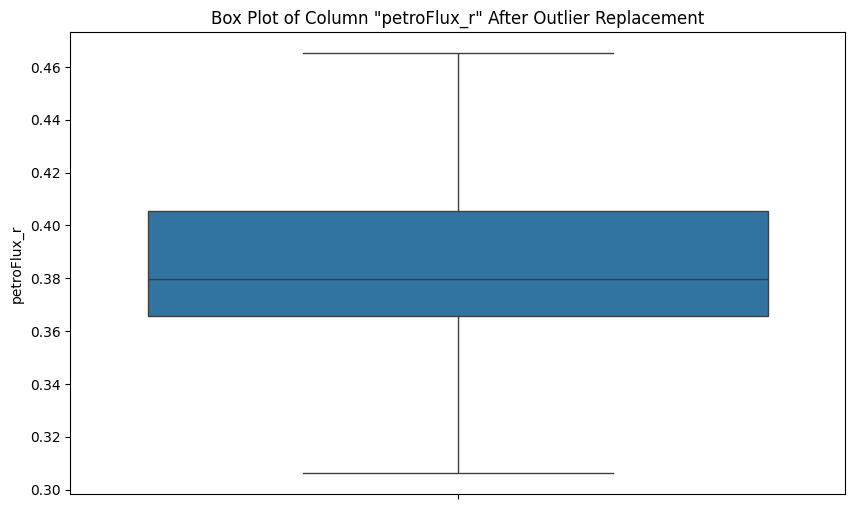

Column: petroFlux_z
Upper Bound for Outliers: 0.5409108836994476
Lower Bound for Outliers: 0.3988905552115478


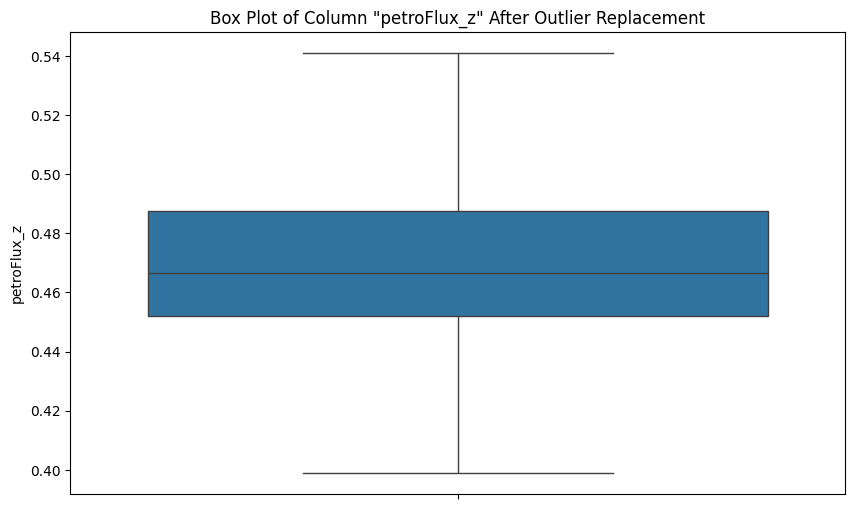

Column: petroR50_u
Upper Bound for Outliers: 0.0517452147914336
Lower Bound for Outliers: -0.008394489472194951


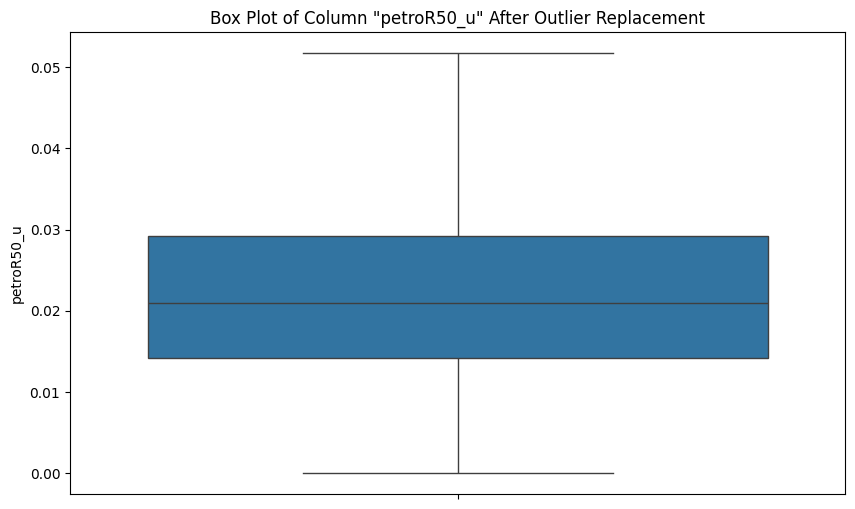

Column: petroR50_g
Upper Bound for Outliers: 0.03374711912273916
Lower Bound for Outliers: -0.004612055300627216


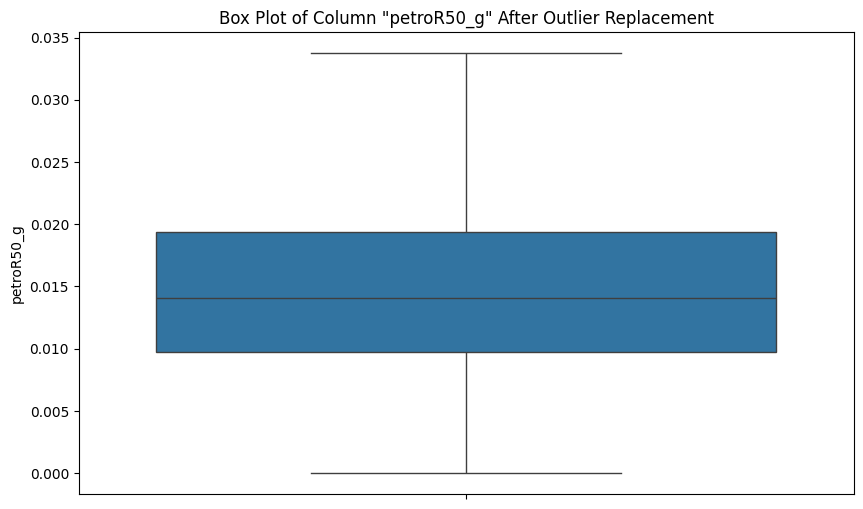

Column: petroR50_i
Upper Bound for Outliers: 0.02751143056758442
Lower Bound for Outliers: -0.003253288471336248


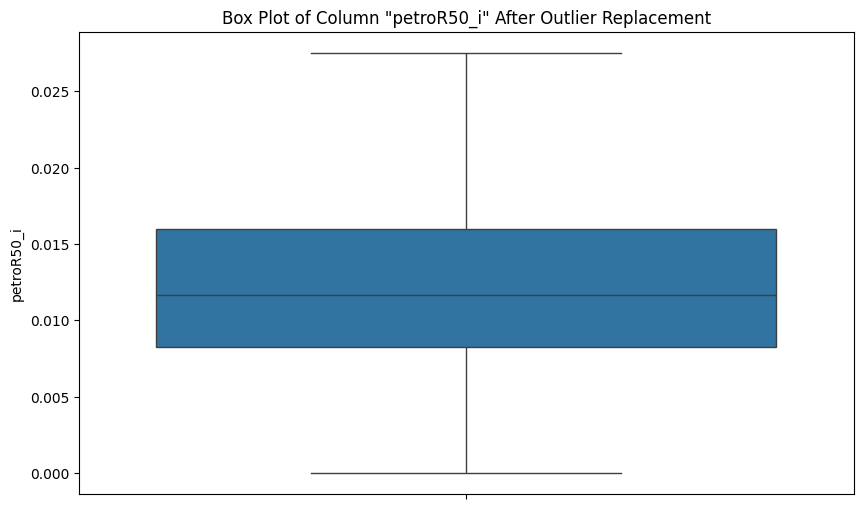

Column: petroR50_r
Upper Bound for Outliers: 0.023078182906552662
Lower Bound for Outliers: -0.0032171764917874202


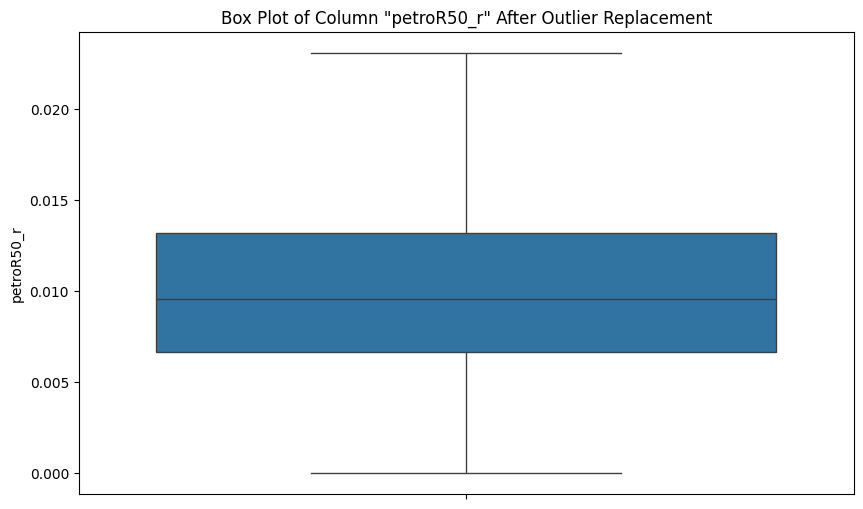

Column: petroR50_z
Upper Bound for Outliers: 0.05240861990121777
Lower Bound for Outliers: -0.004427833636917938


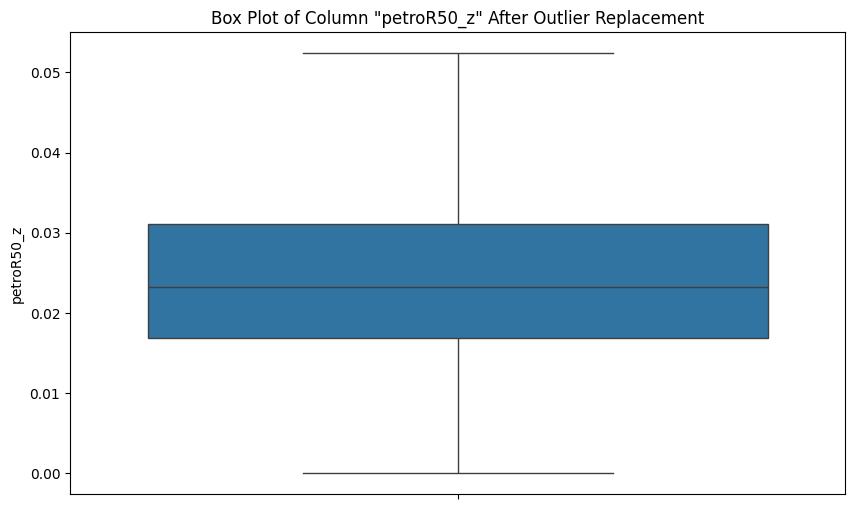

Column: psfMag_u
Upper Bound for Outliers: 0.6786300960434641
Lower Bound for Outliers: 0.24029272320849882


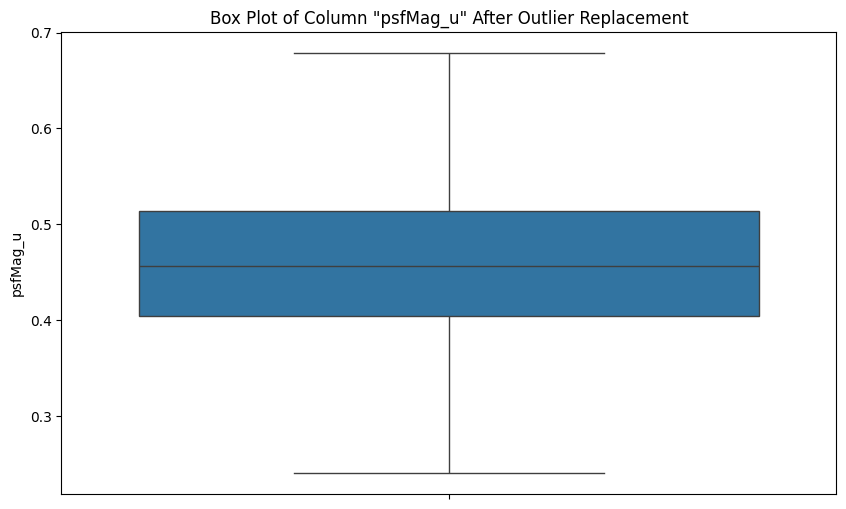

Column: psfMag_r
Upper Bound for Outliers: 0.6730649416101917
Lower Bound for Outliers: 0.19048961920380325


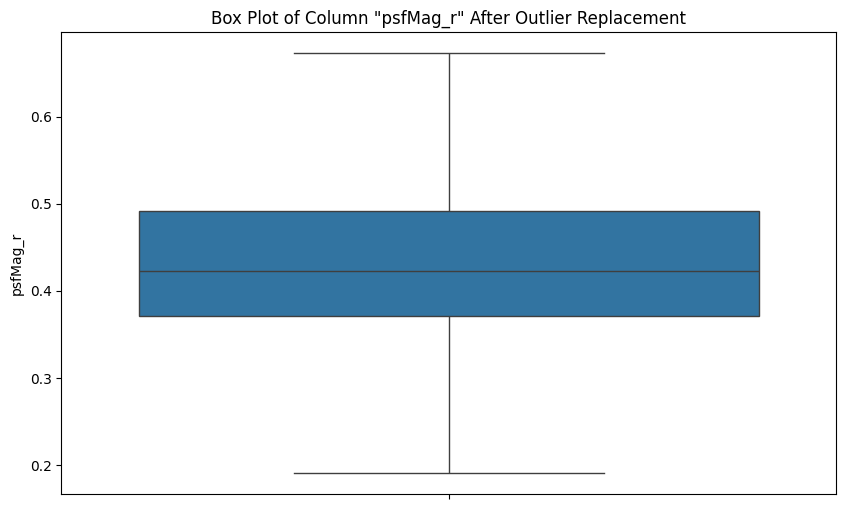

Column: psfMag_g
Upper Bound for Outliers: 0.6217359119219455
Lower Bound for Outliers: 0.19065949913425884


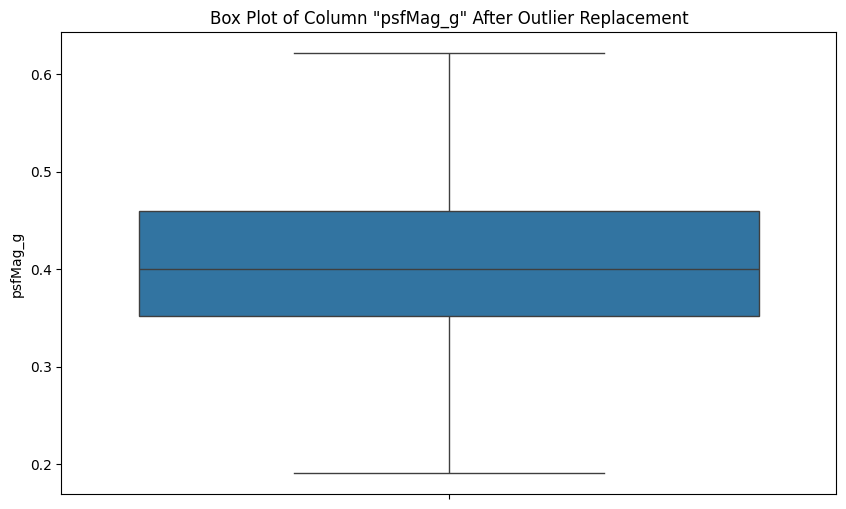

Column: psfMag_i
Upper Bound for Outliers: 0.604504644210822
Lower Bound for Outliers: 0.14503080121425002


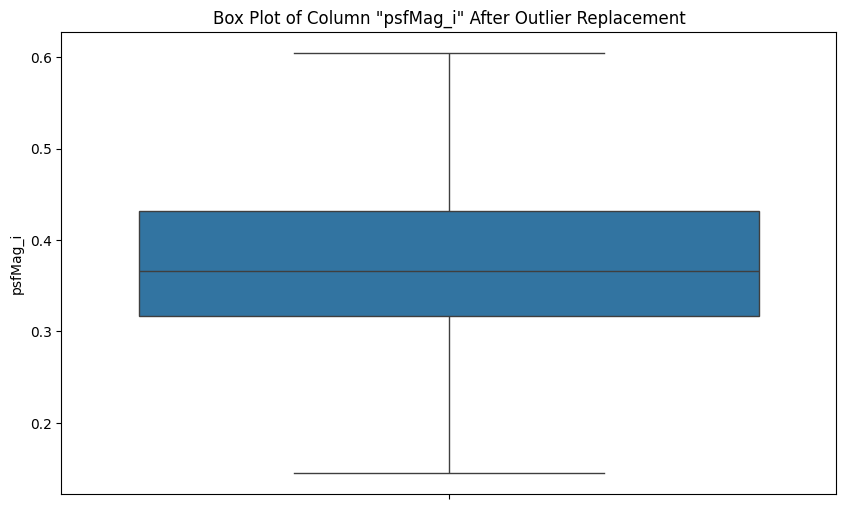

Column: psfMag_z
Upper Bound for Outliers: 0.5460577186508194
Lower Bound for Outliers: 0.1355037291903639


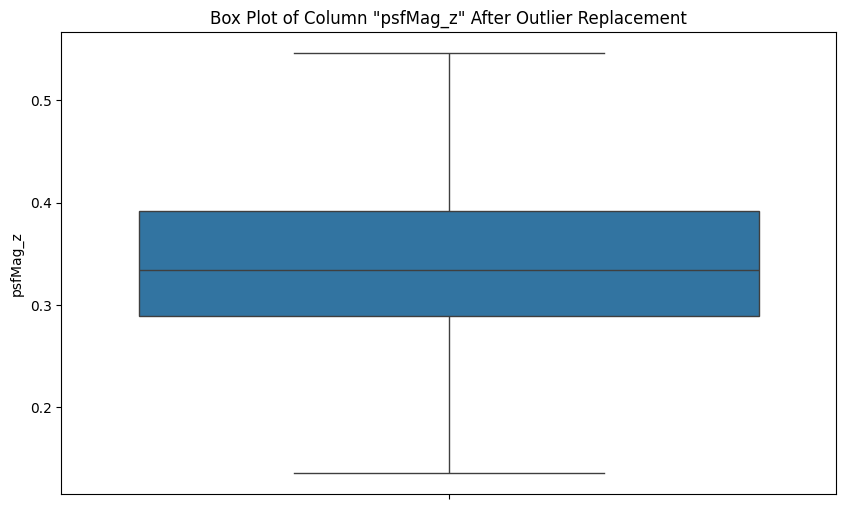

Column: expAB_u
Upper Bound for Outliers: 1.3155441128034042
Lower Bound for Outliers: -0.3682735768232349


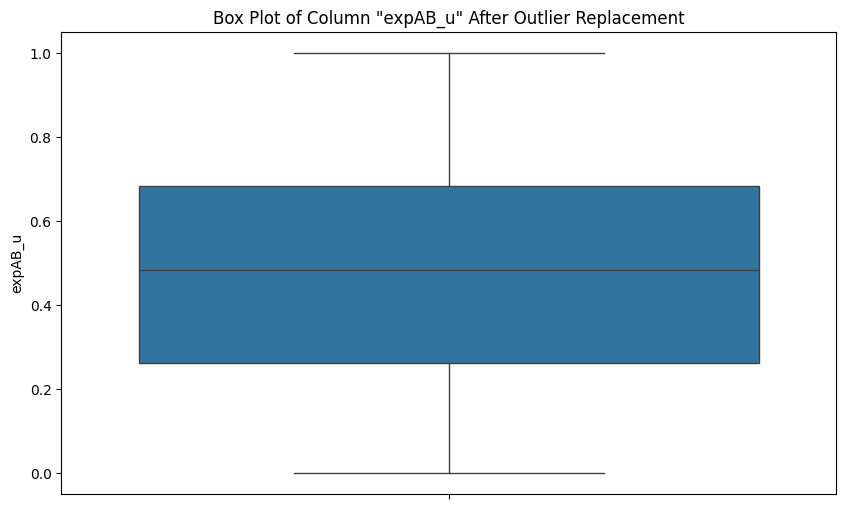

Column: expAB_g
Upper Bound for Outliers: 1.3407889987532626
Lower Bound for Outliers: -0.21695113082152878


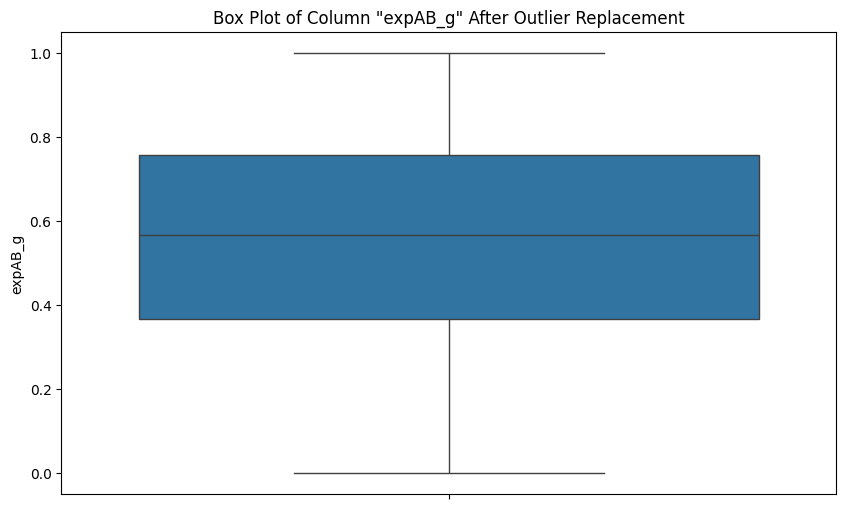

Column: expAB_r
Upper Bound for Outliers: 1.3226730085667437
Lower Bound for Outliers: -0.17238614516727996


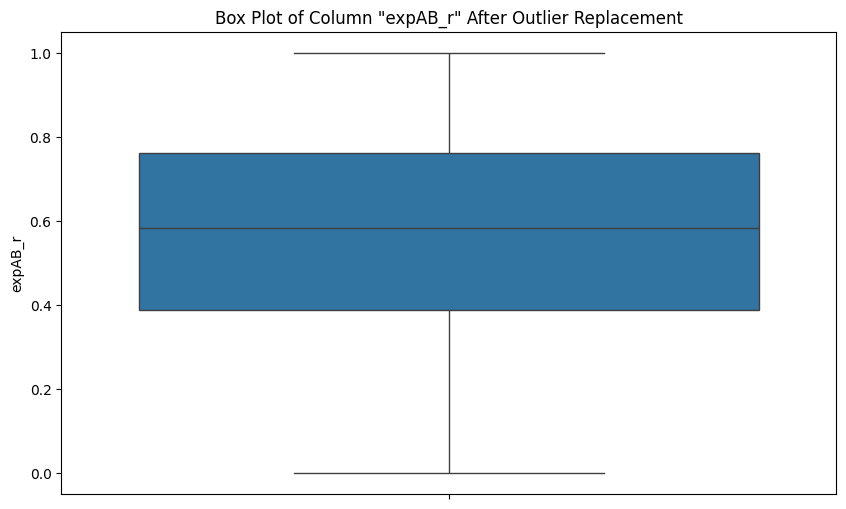

Column: expAB_i
Upper Bound for Outliers: 1.3206687894736842
Lower Bound for Outliers: -0.171307


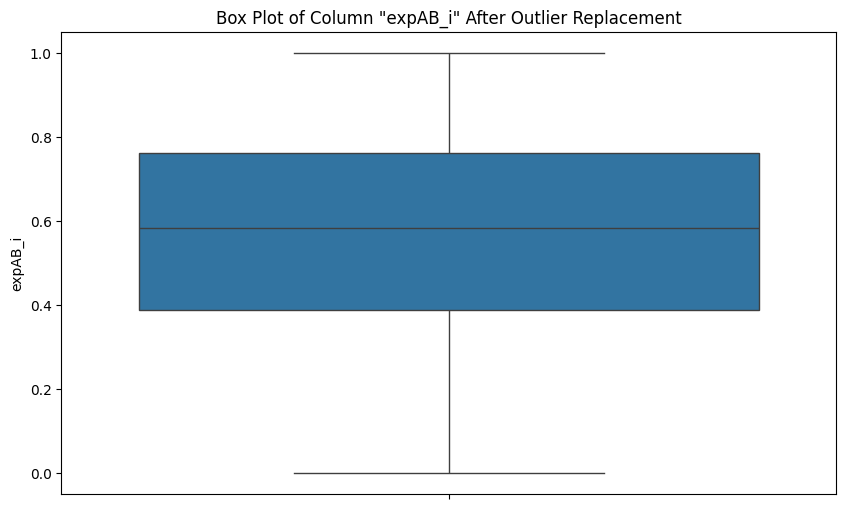

Column: expAB_z
Upper Bound for Outliers: 1.3249556078152982
Lower Bound for Outliers: -0.23685771332432898


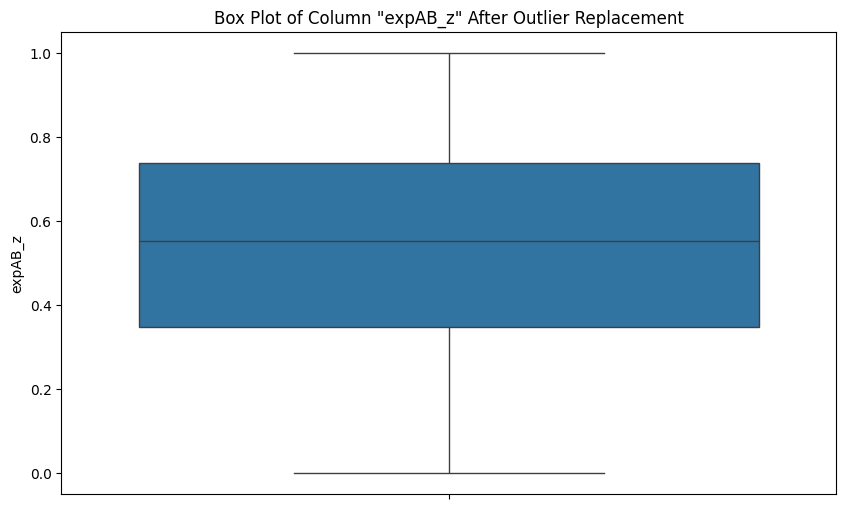

Column: redshift
Upper Bound for Outliers: 0.5697762173796894
Lower Bound for Outliers: -0.12497660942112088


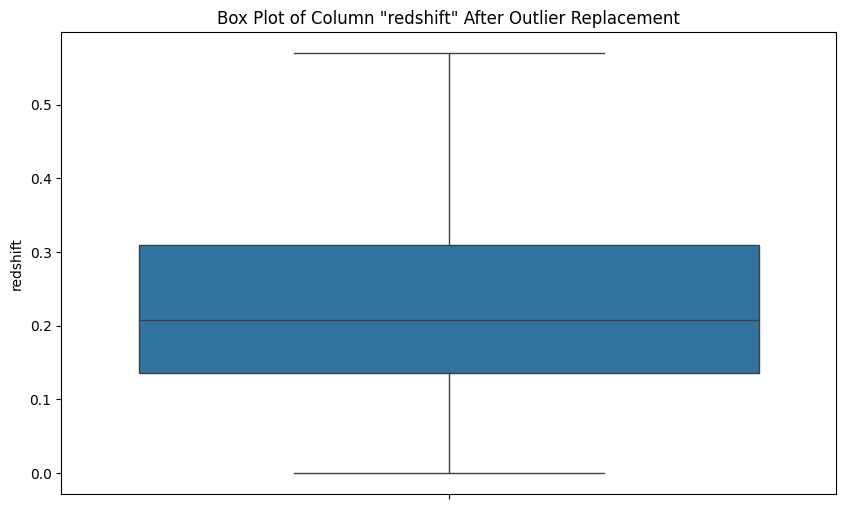

Column: redshift_err
Upper Bound for Outliers: 0.12515297942349876
Lower Bound for Outliers: -0.029617190448619164


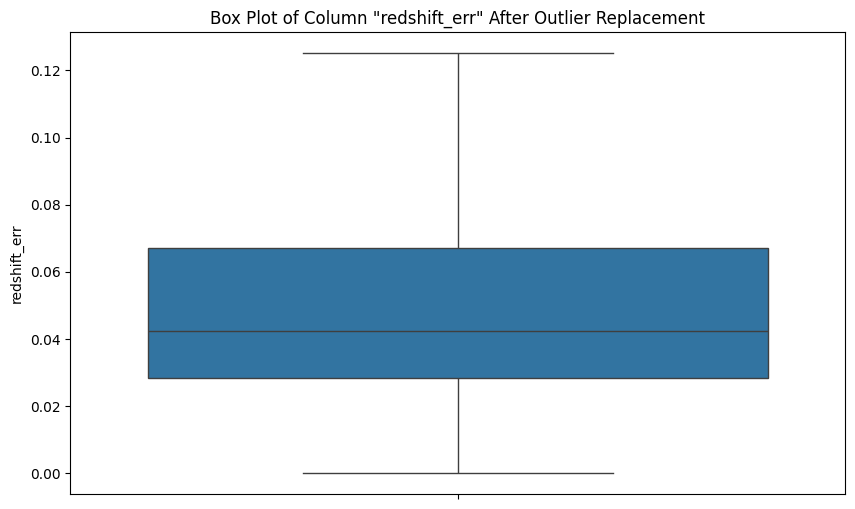

In [71]:
# specify target feature
target_column = 'subclass'



# Function to handle outliers for a given column

def handle_outliers(column):

    # Calculate quantiles

    quant = column.quantile(q=[0.75, 0.25])

    Q3 = quant.loc[0.75]

    Q1 = quant.loc[0.25]



    # Calculate IQR

    IQR = Q3 - Q1



    # Define whisker bounds

    upper_bound = Q3 + 1.5 * IQR

    lower_bound = Q1 - 1.5 * IQR



    # Replace outliers with the bounds

    column = np.where(column > upper_bound, upper_bound, column)

    column = np.where(column < lower_bound, lower_bound, column)



    return column, upper_bound, lower_bound



# Exclude the target column and handle outliers for remaining numerical columns

numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols = [col for col in numeric_cols if col != target_column]



for col in numeric_cols:

    # Handle outliers

    df[col], upper_bound, lower_bound = handle_outliers(df[col])



    # Print bounds

    print(f'Column: {col}')

    print(f'Upper Bound for Outliers: {upper_bound}')

    print(f'Lower Bound for Outliers: {lower_bound}')



    # Visualize with a box plot

    plt.figure(figsize=(10, 6))

    sns.boxplot(y=df[col])

    plt.title(f'Box Plot of Column "{col}" After Outlier Replacement')

    plt.show()

u


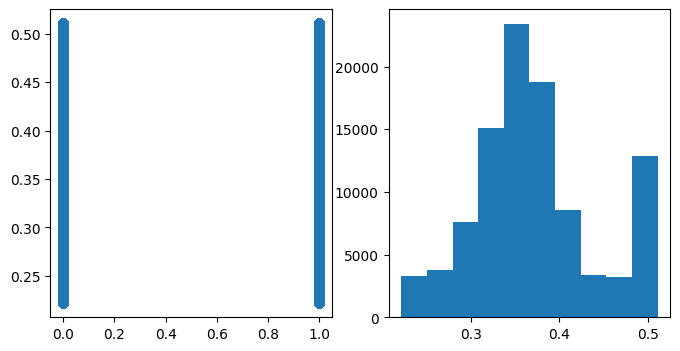

g


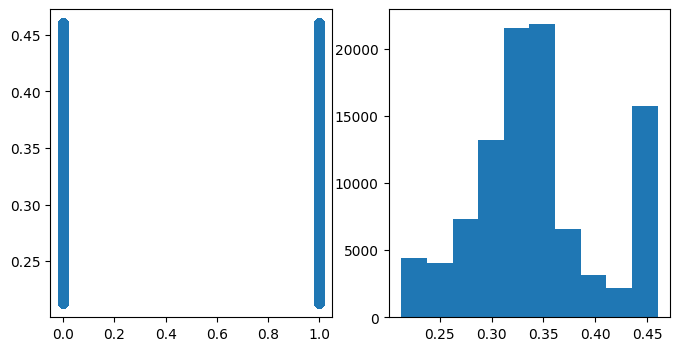

r


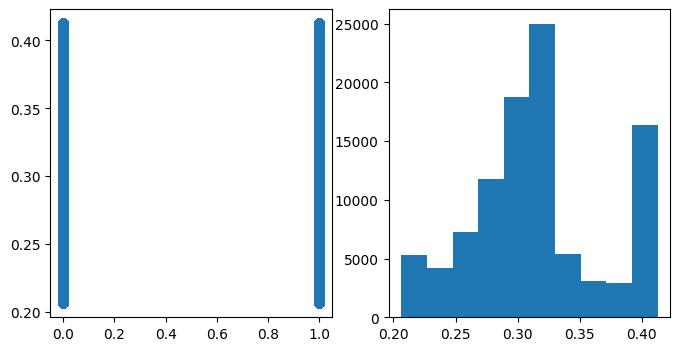

i


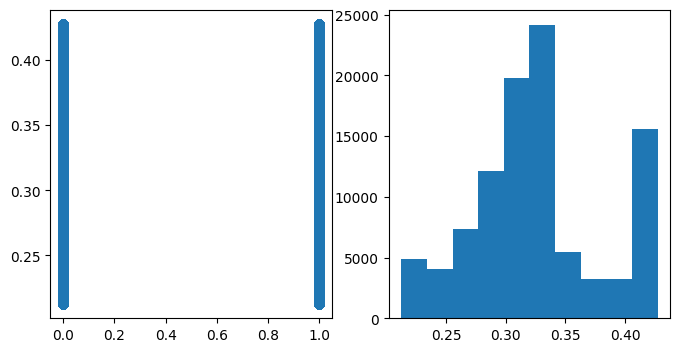

z


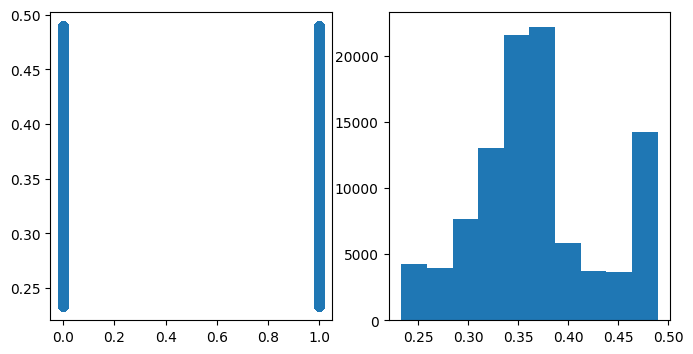

modelFlux_u


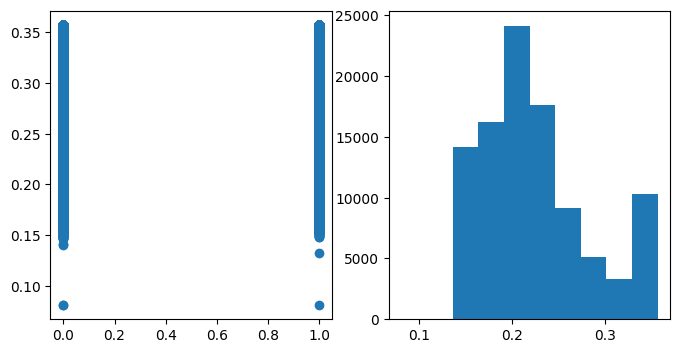

modelFlux_g


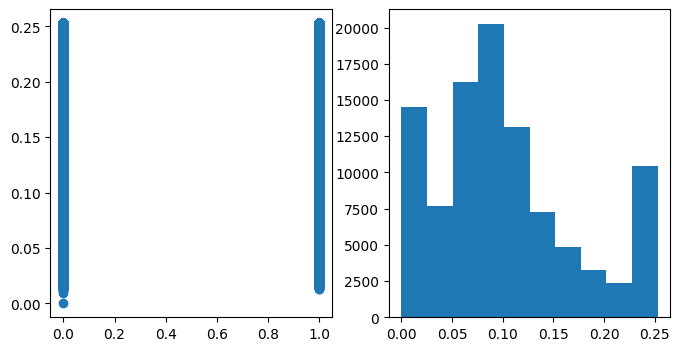

modelFlux_r


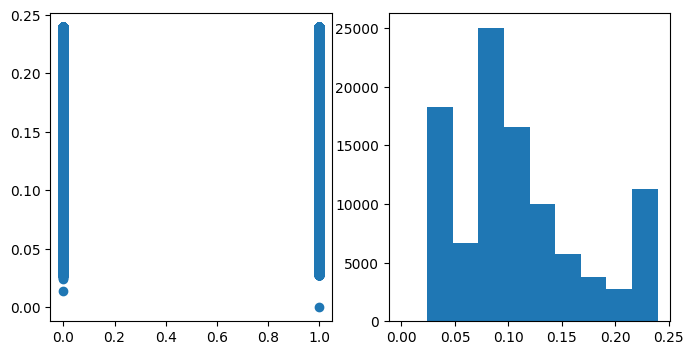

modelFlux_i


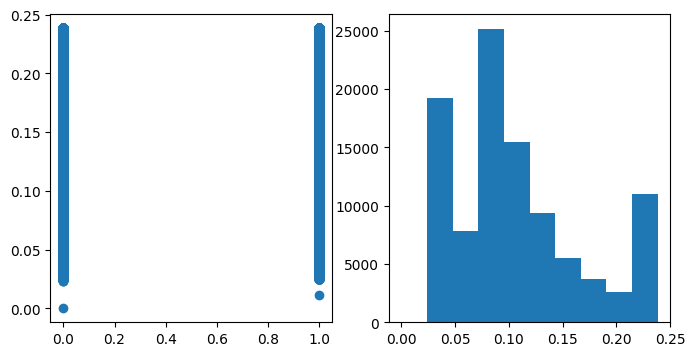

modelFlux_z


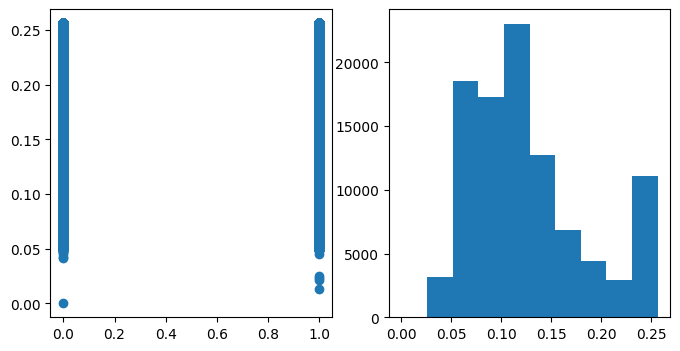

petroRad_u


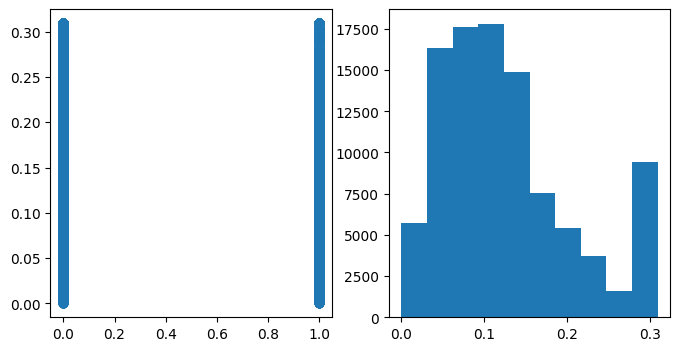

petroRad_g


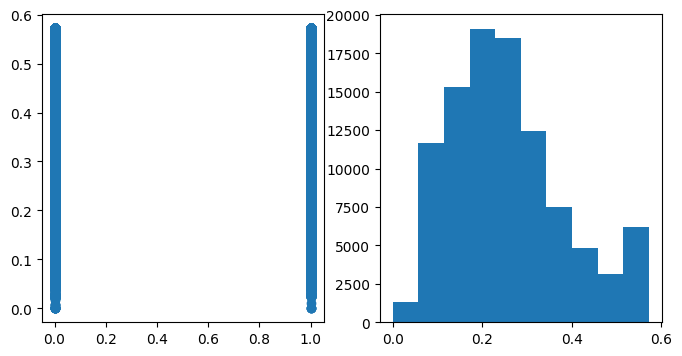

petroRad_i


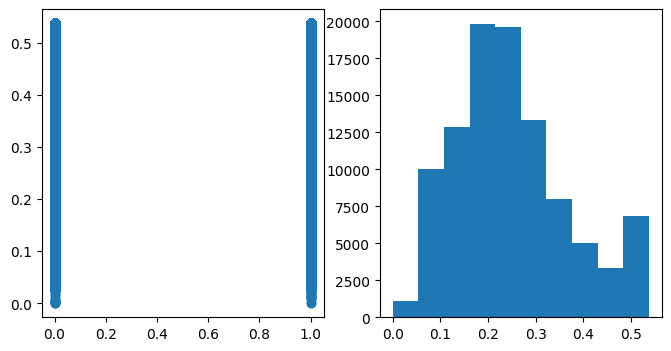

petroRad_r


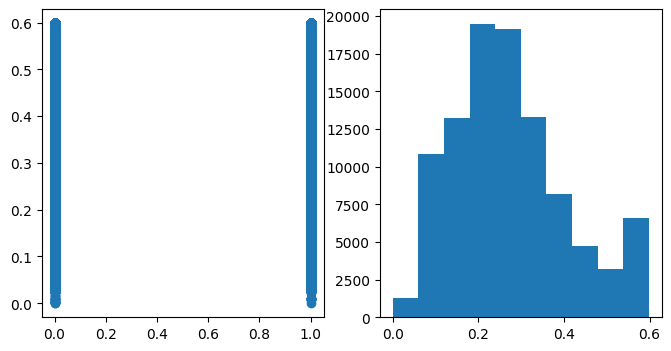

petroRad_z


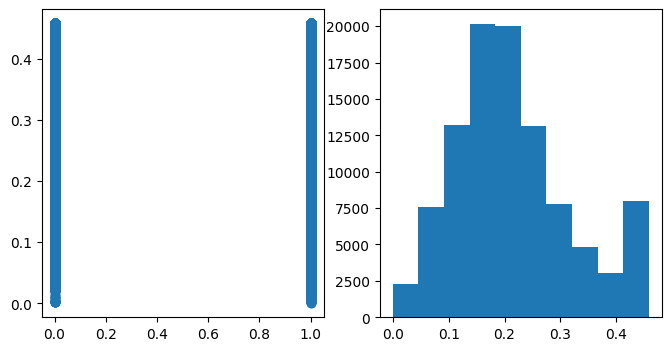

petroFlux_u


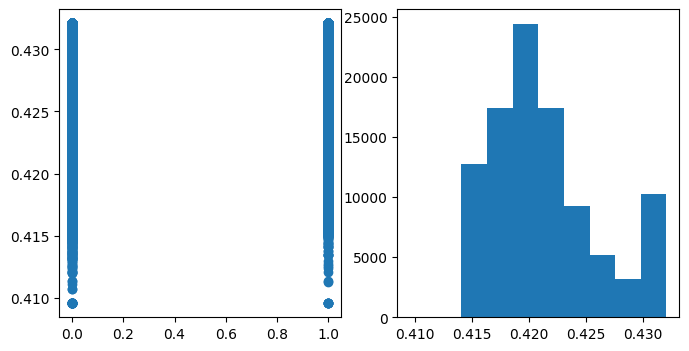

petroFlux_g


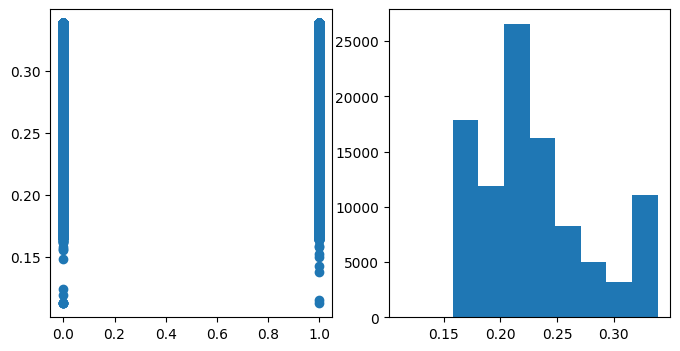

petroFlux_i


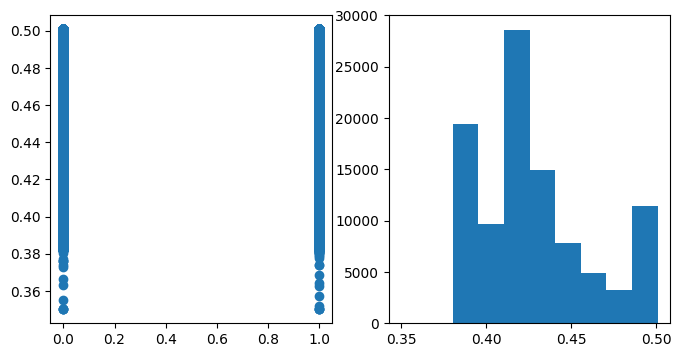

petroFlux_r


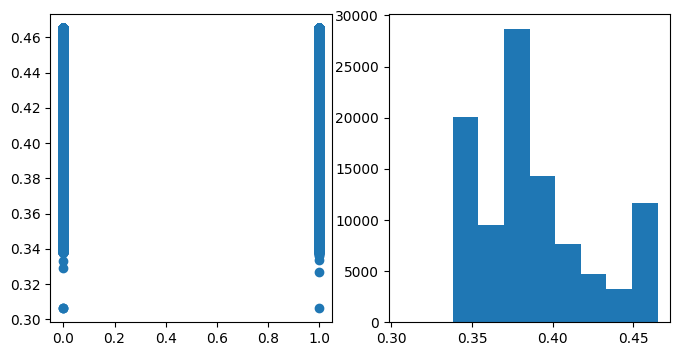

petroFlux_z


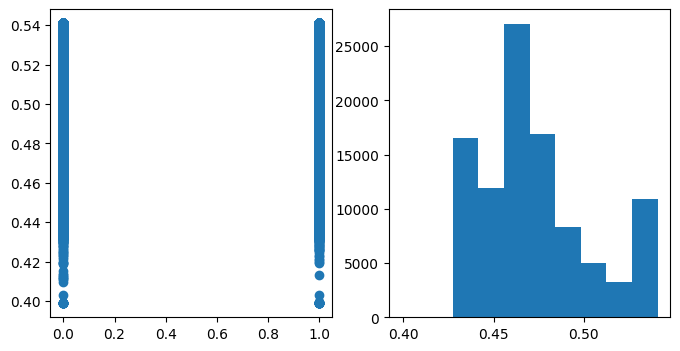

petroR50_u


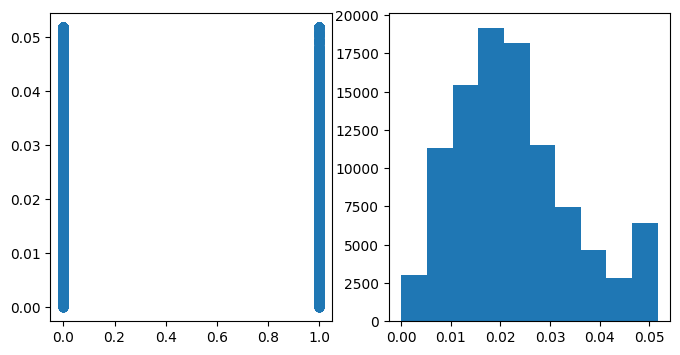

petroR50_g


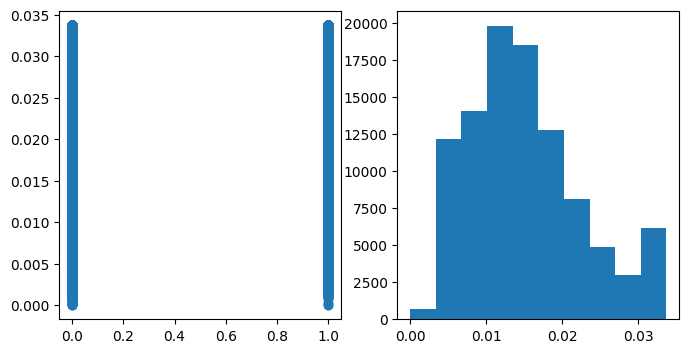

petroR50_i


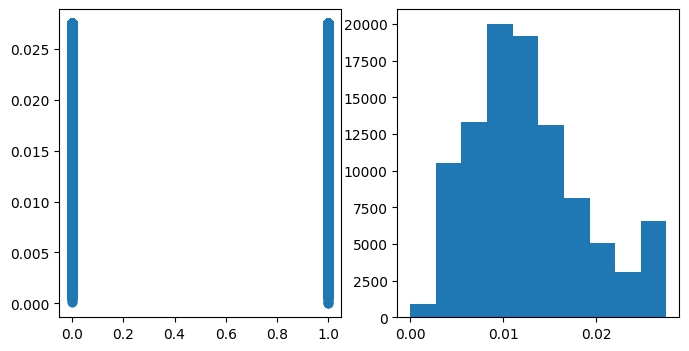

petroR50_r


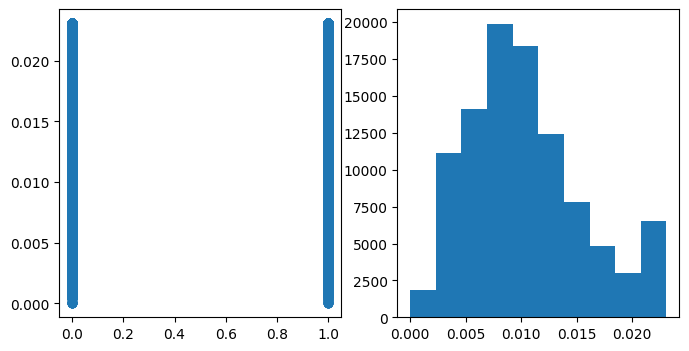

petroR50_z


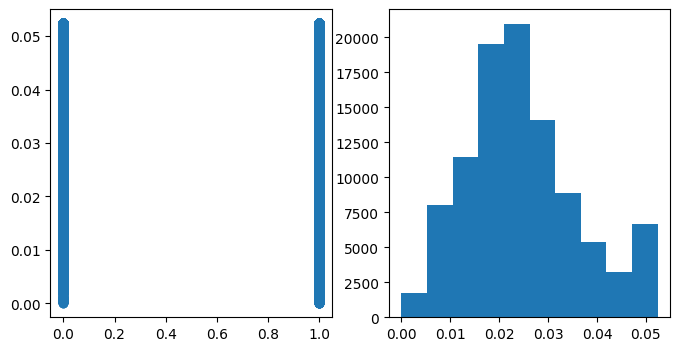

psfMag_u


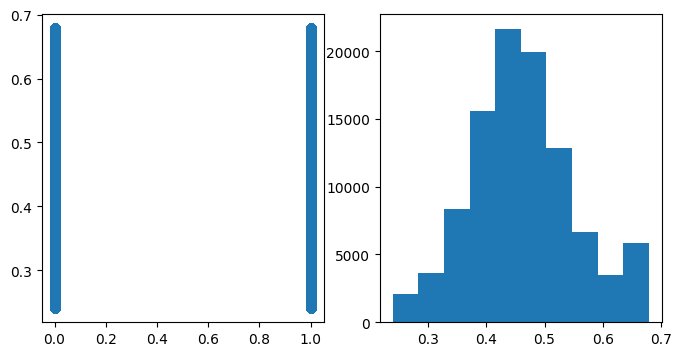

psfMag_r


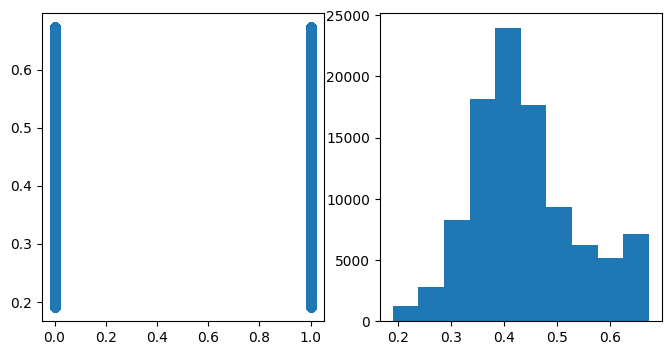

psfMag_g


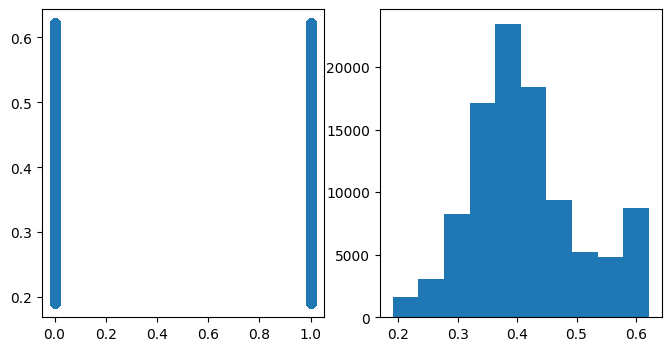

psfMag_i


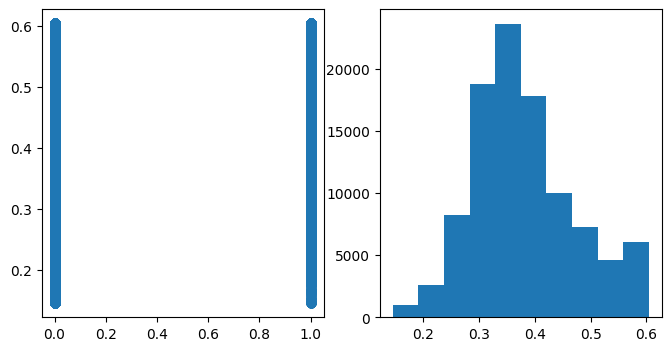

psfMag_z


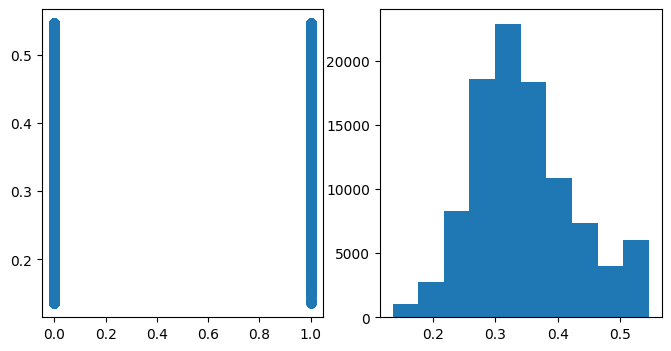

expAB_u


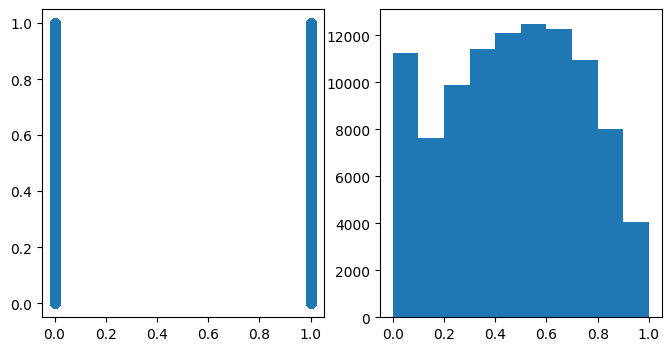

expAB_g


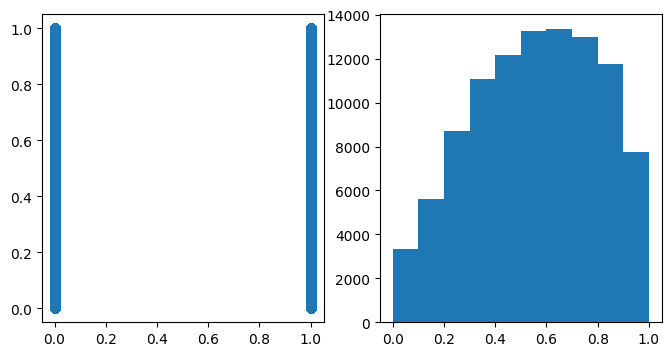

expAB_r


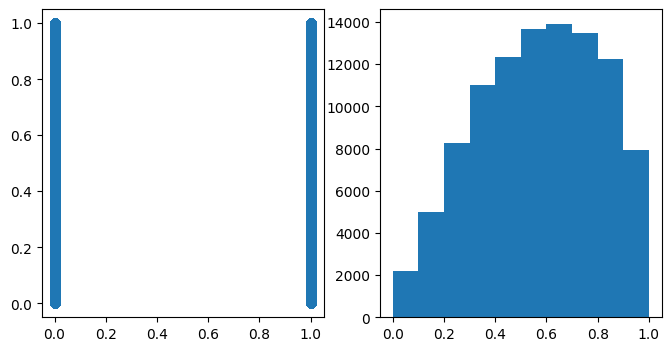

expAB_i


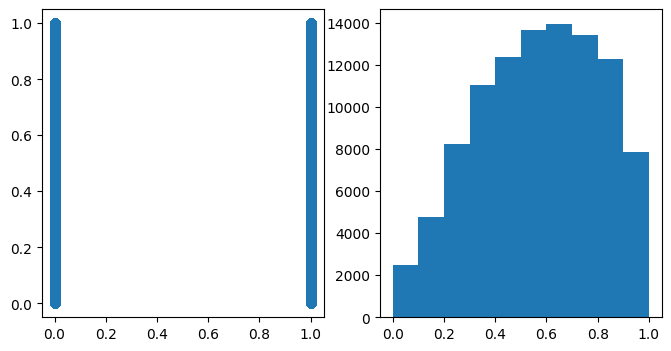

expAB_z


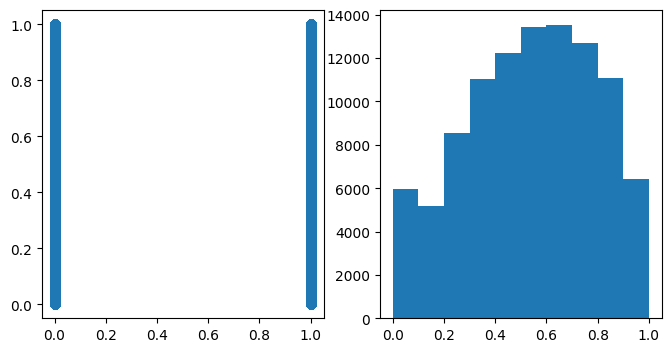

subclass


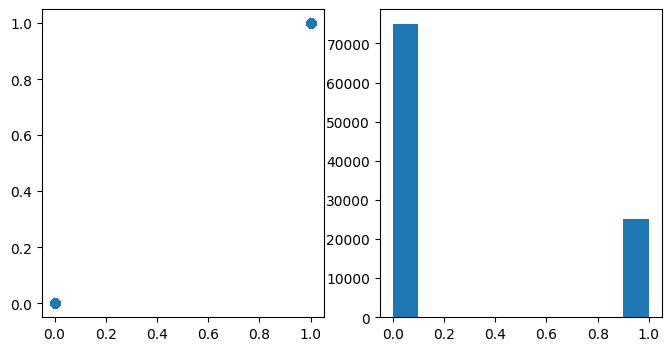

redshift


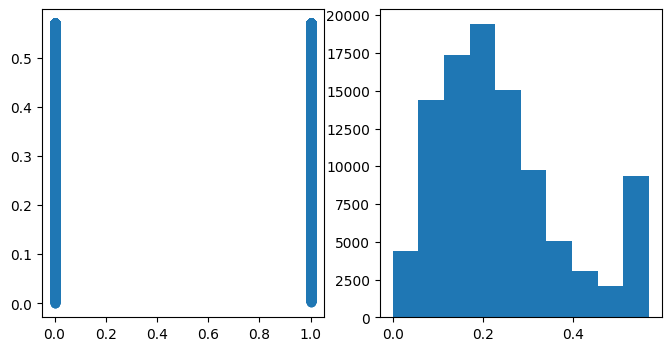

redshift_err


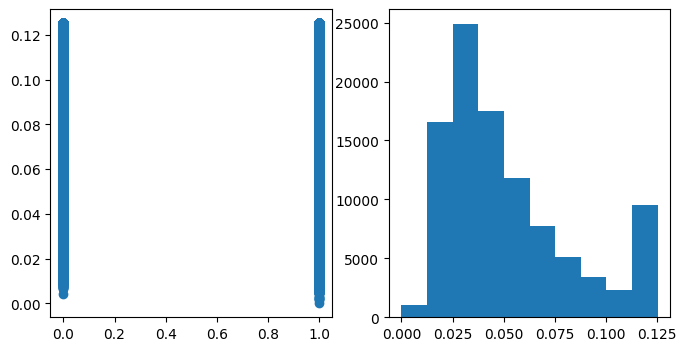

In [72]:
# using univariant analysis
numeric_cols = df.columns

# make a graph of all numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    print(col)
    plt.subplot(1, 2, 1)
    # box plot
    plt.scatter(data=df, x='subclass', y=col)
    plt.subplot(1, 2, 2)
    # histogram
    plt.hist(df[col])
    plt.show()


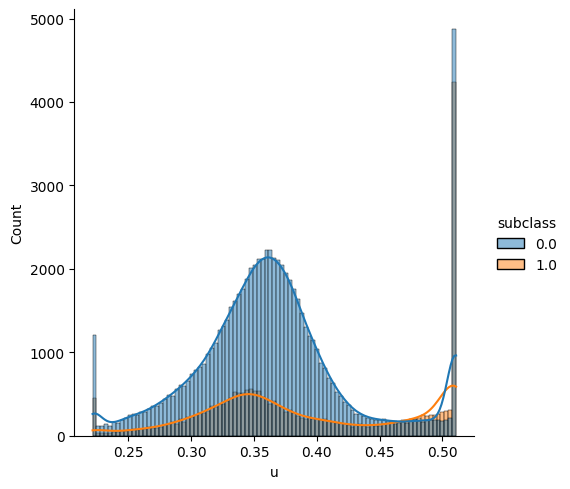

In [73]:

sns.displot(data=df, x='u', hue='subclass', kde=True);

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


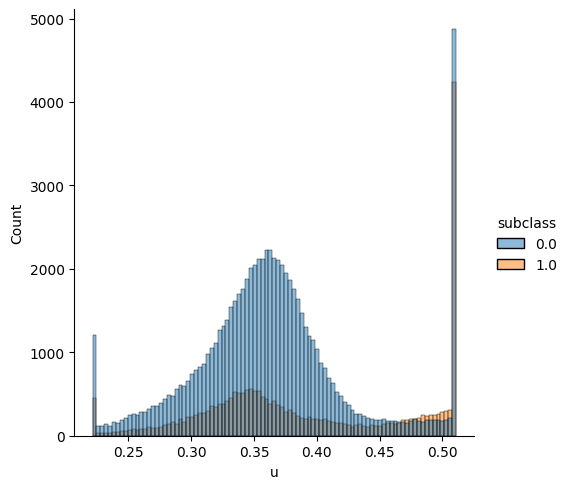

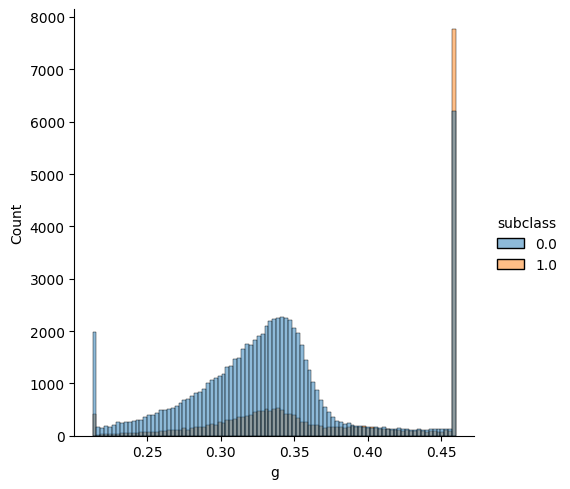

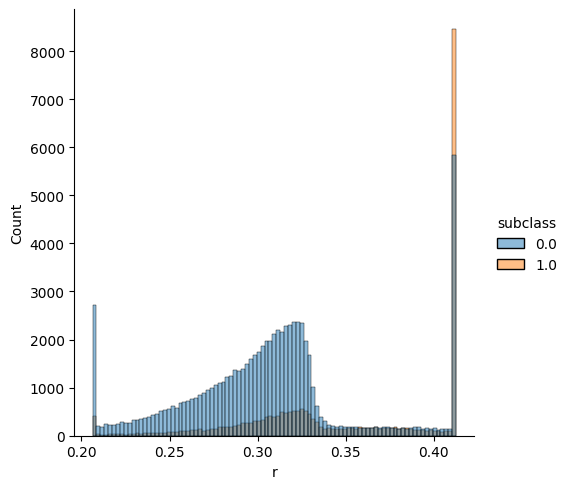

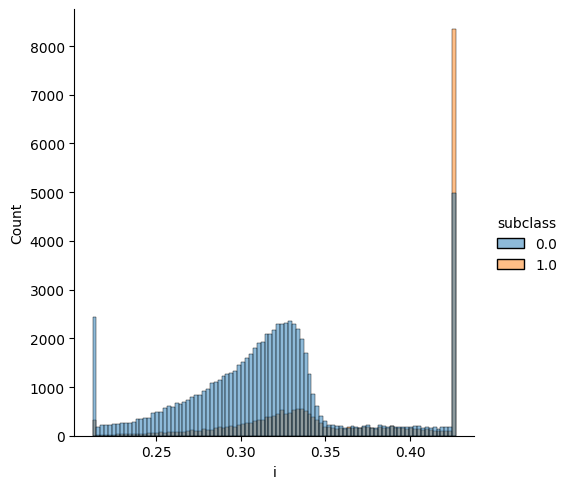

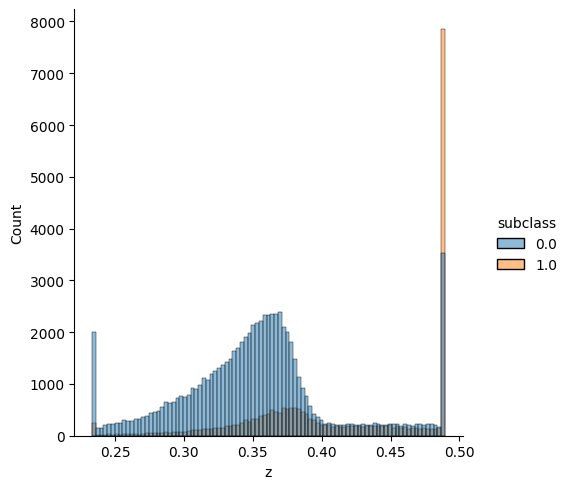

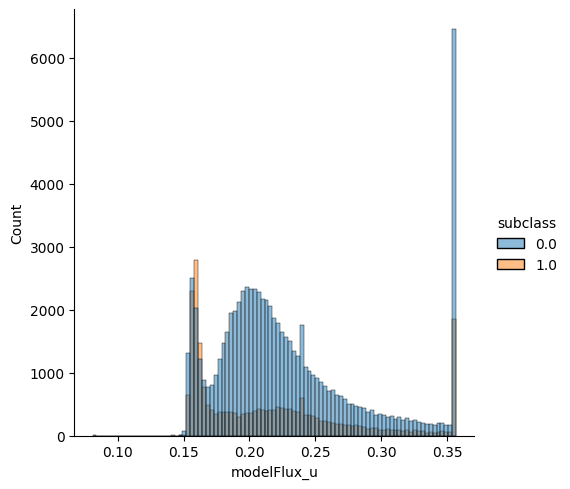

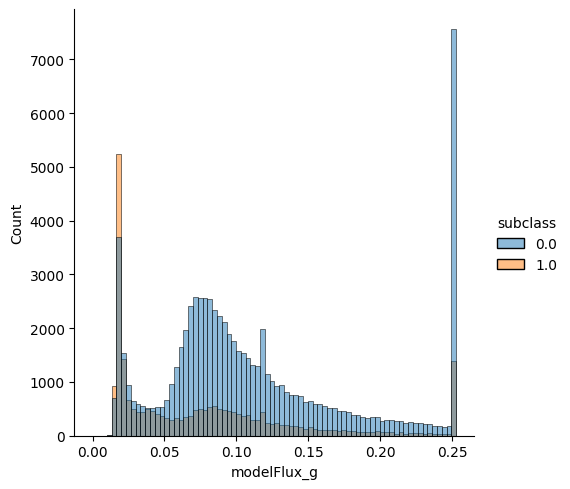

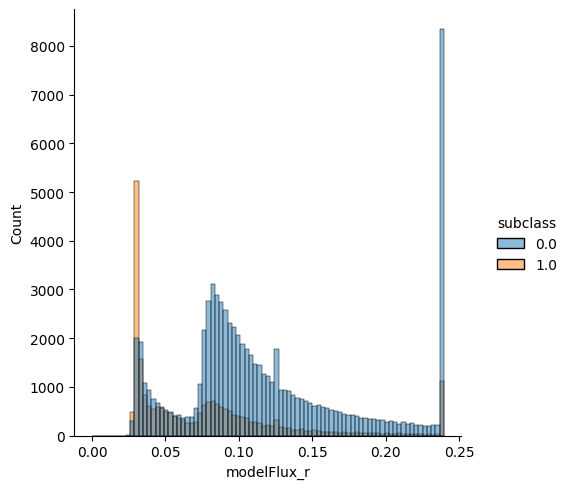

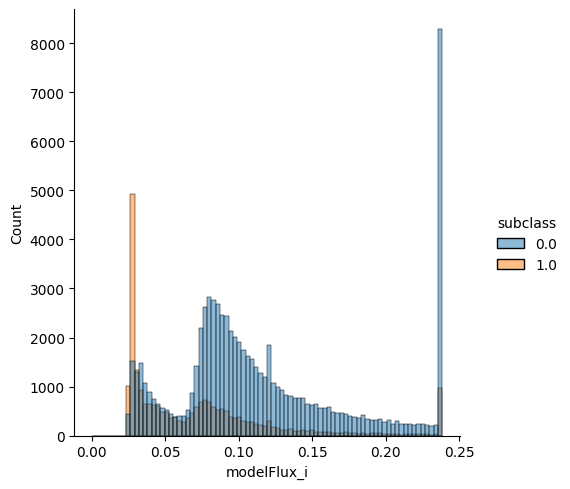

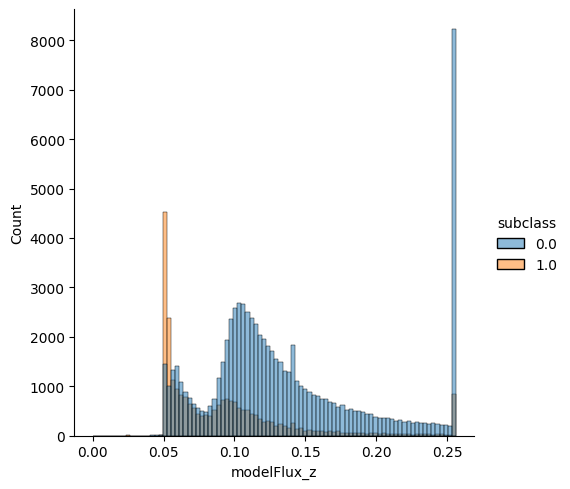

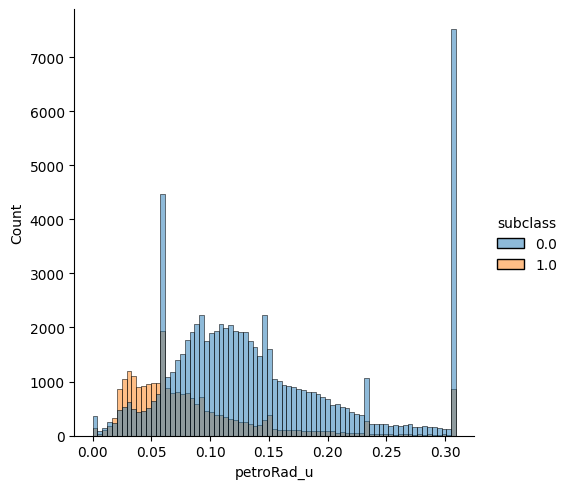

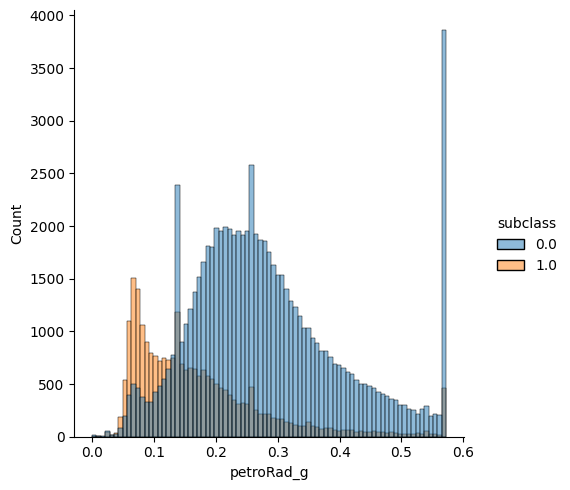

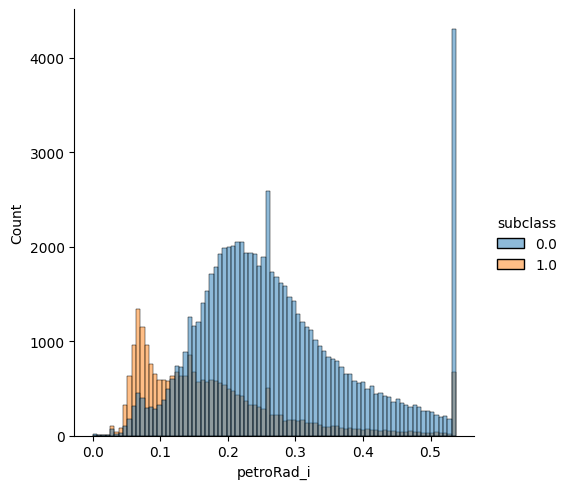

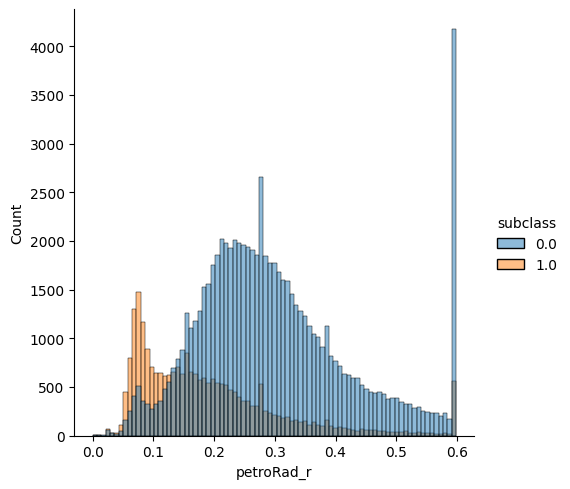

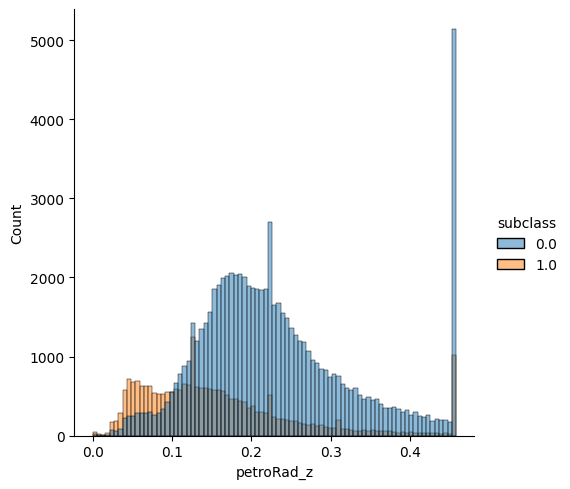

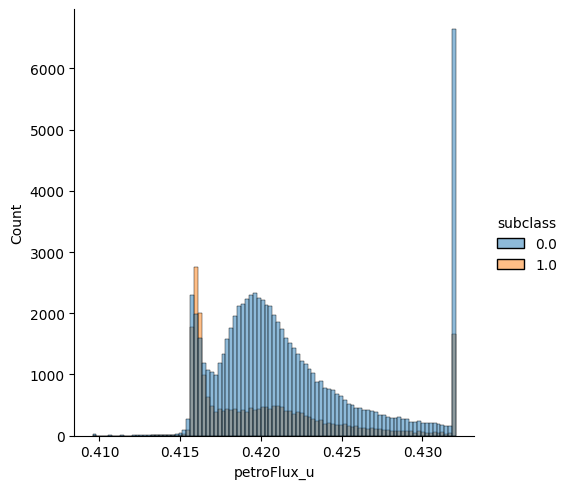

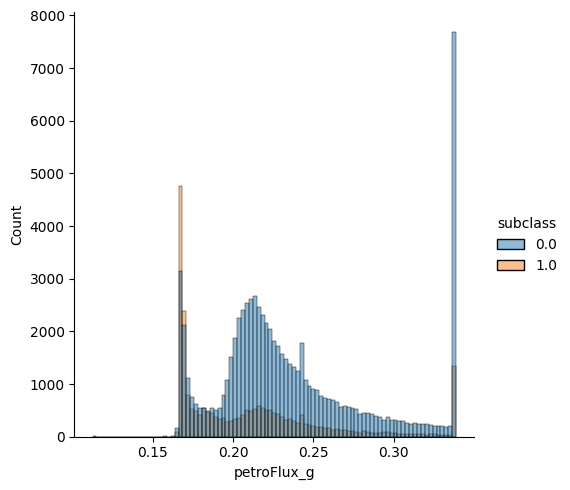

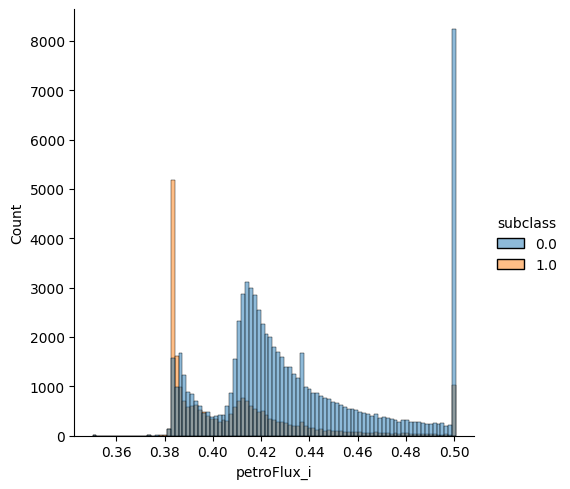

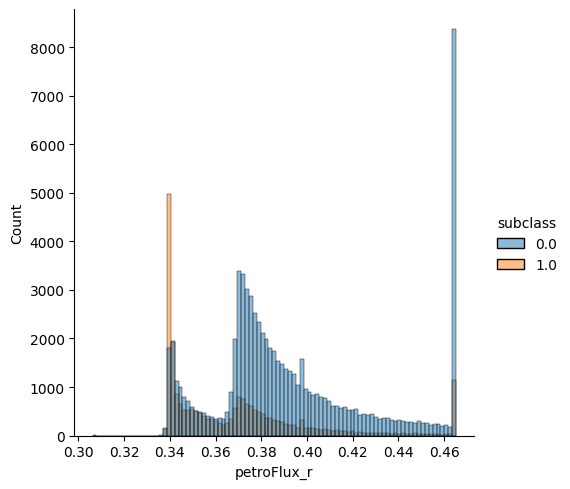

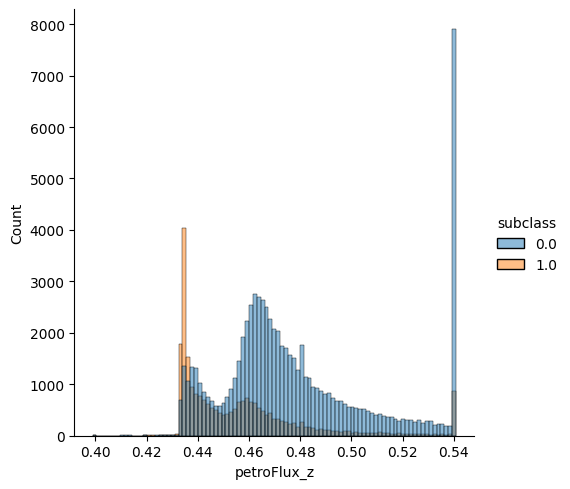

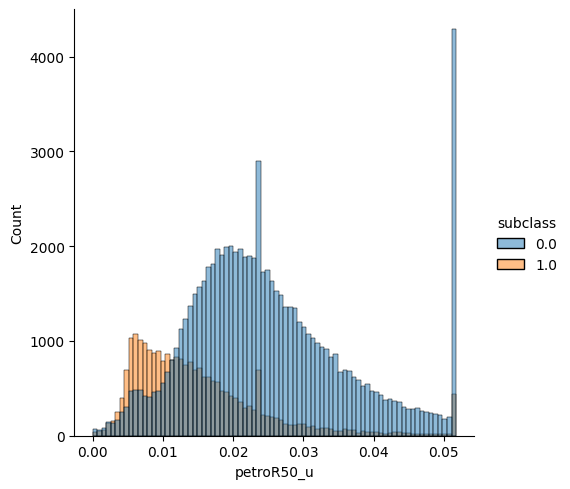

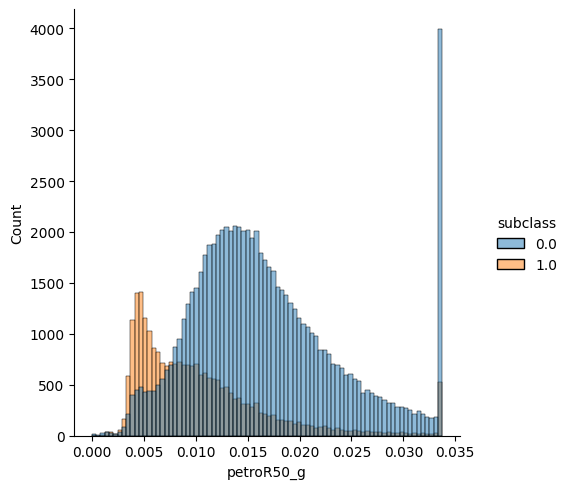

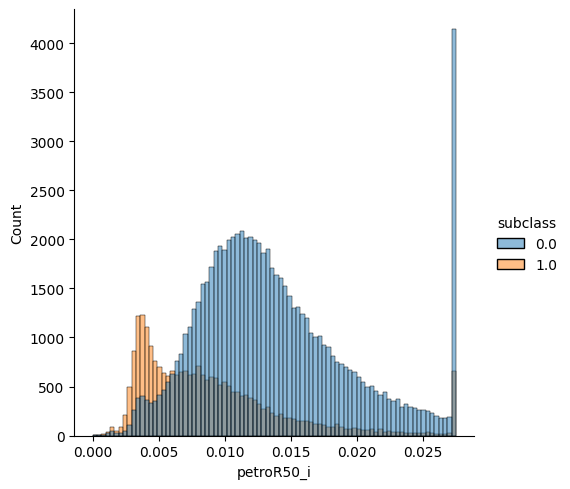

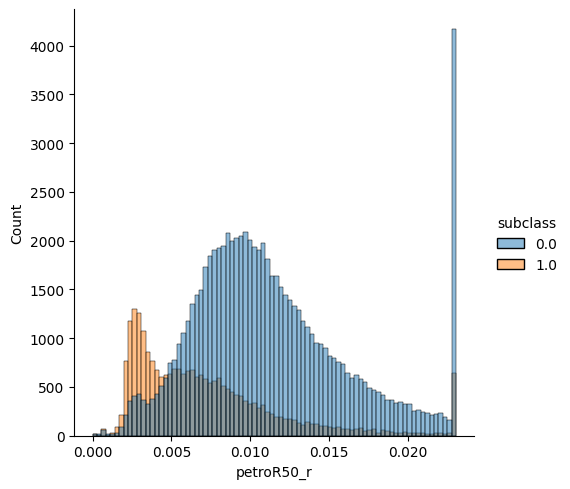

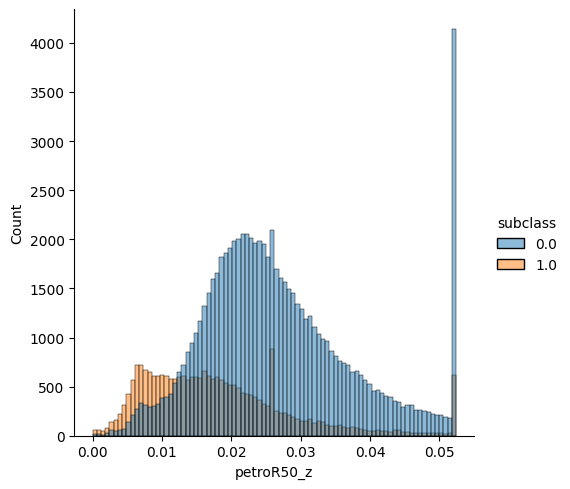

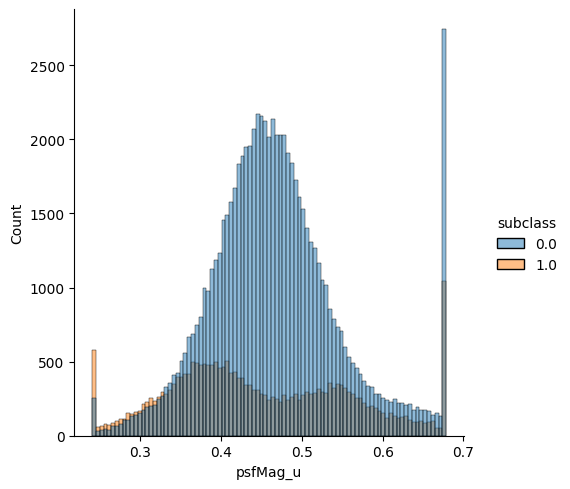

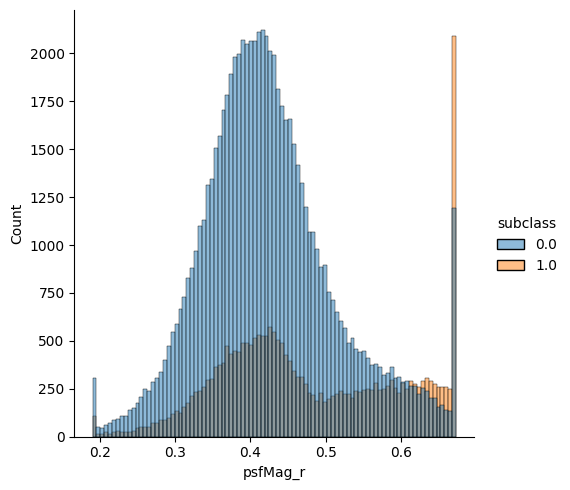

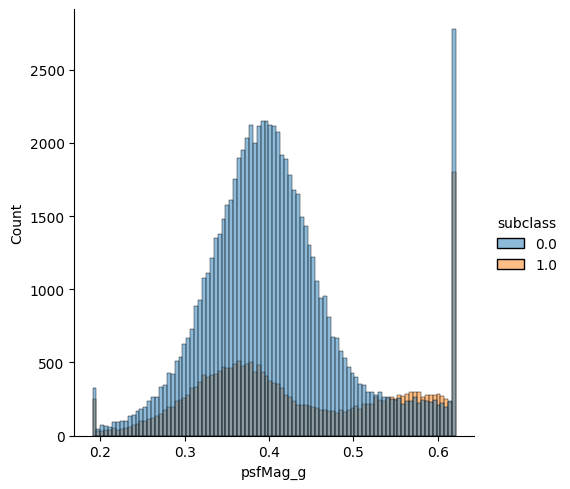

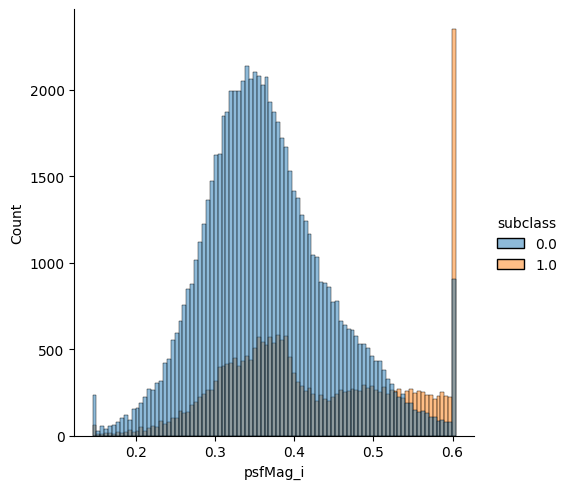

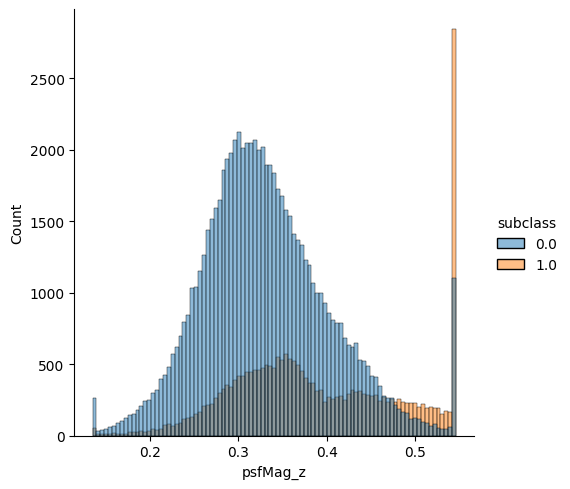

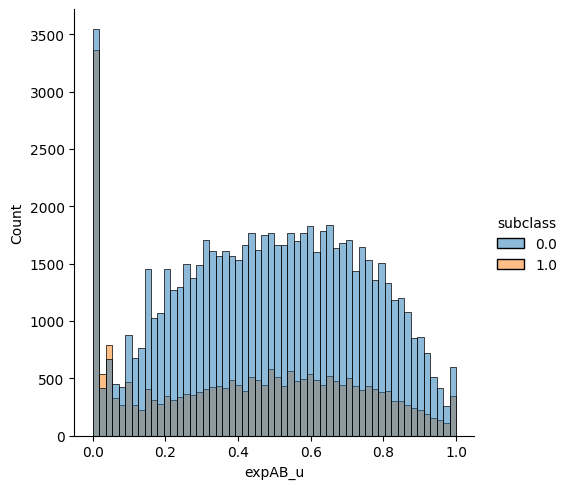

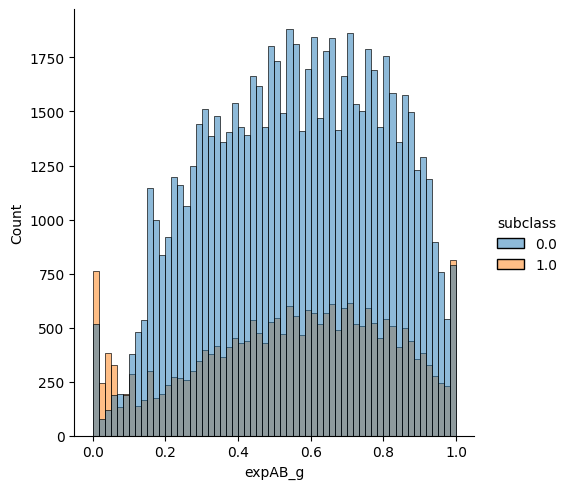

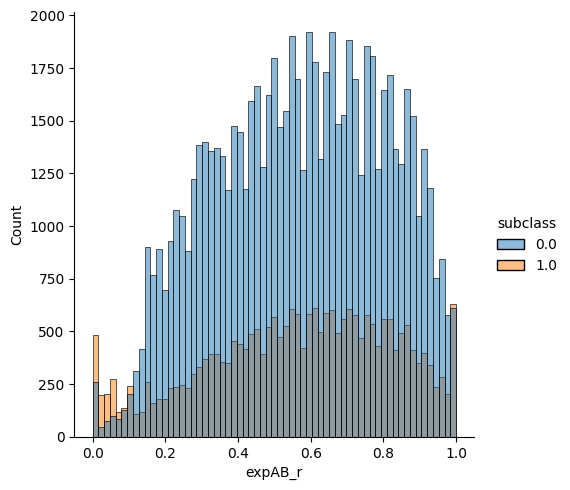

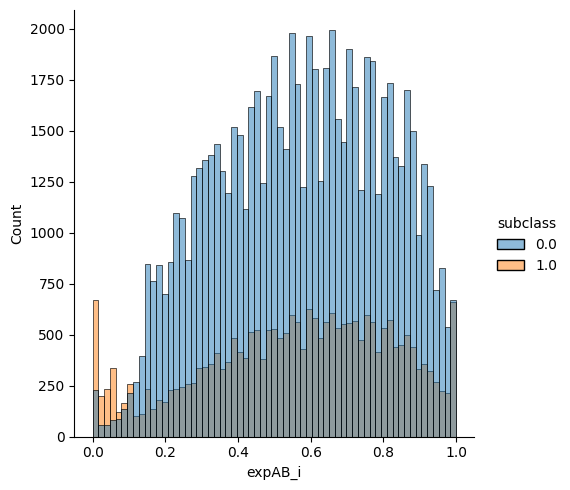

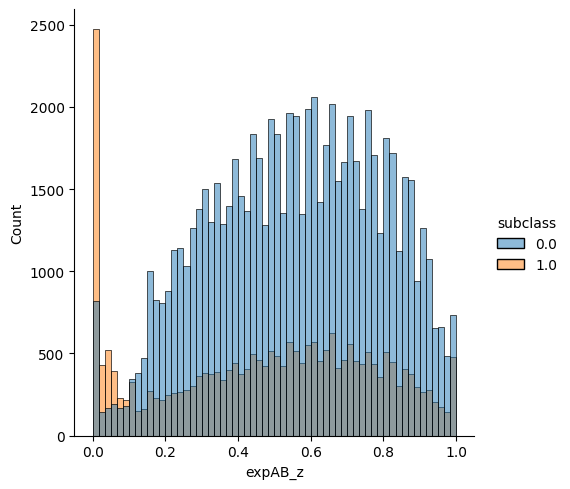

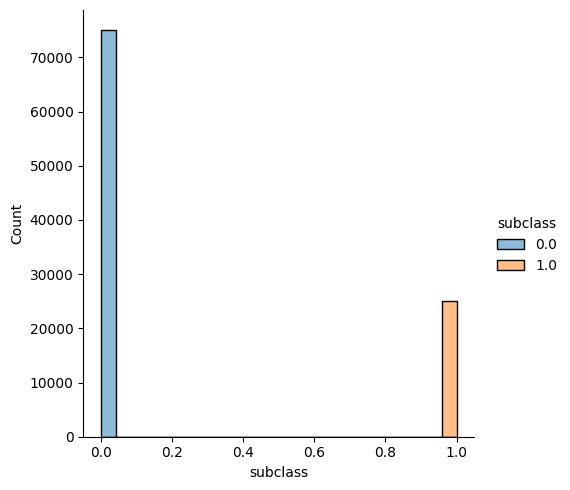

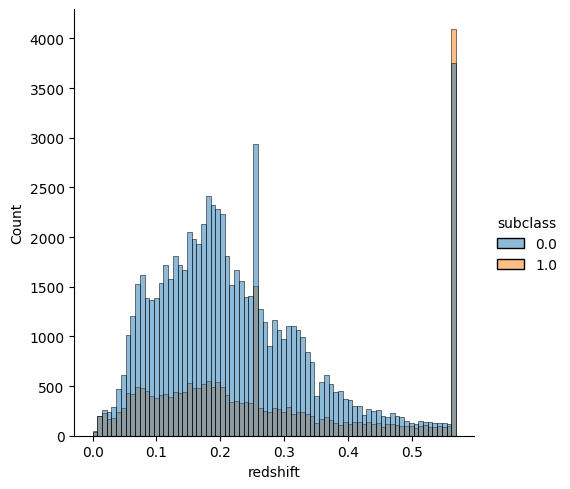

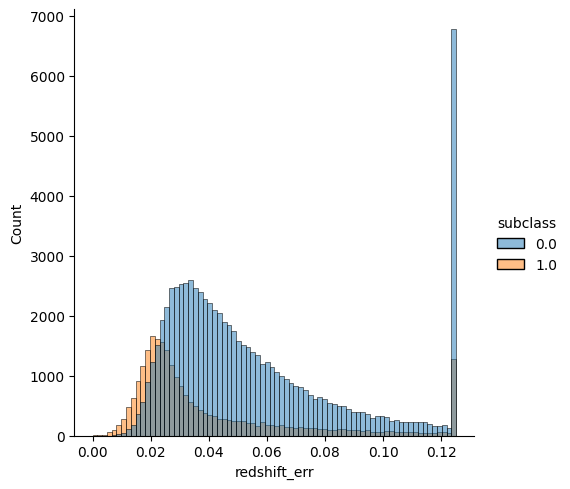

In [74]:
for col in numeric_cols:
    sns.displot(data=df, x=col, hue='subclass');

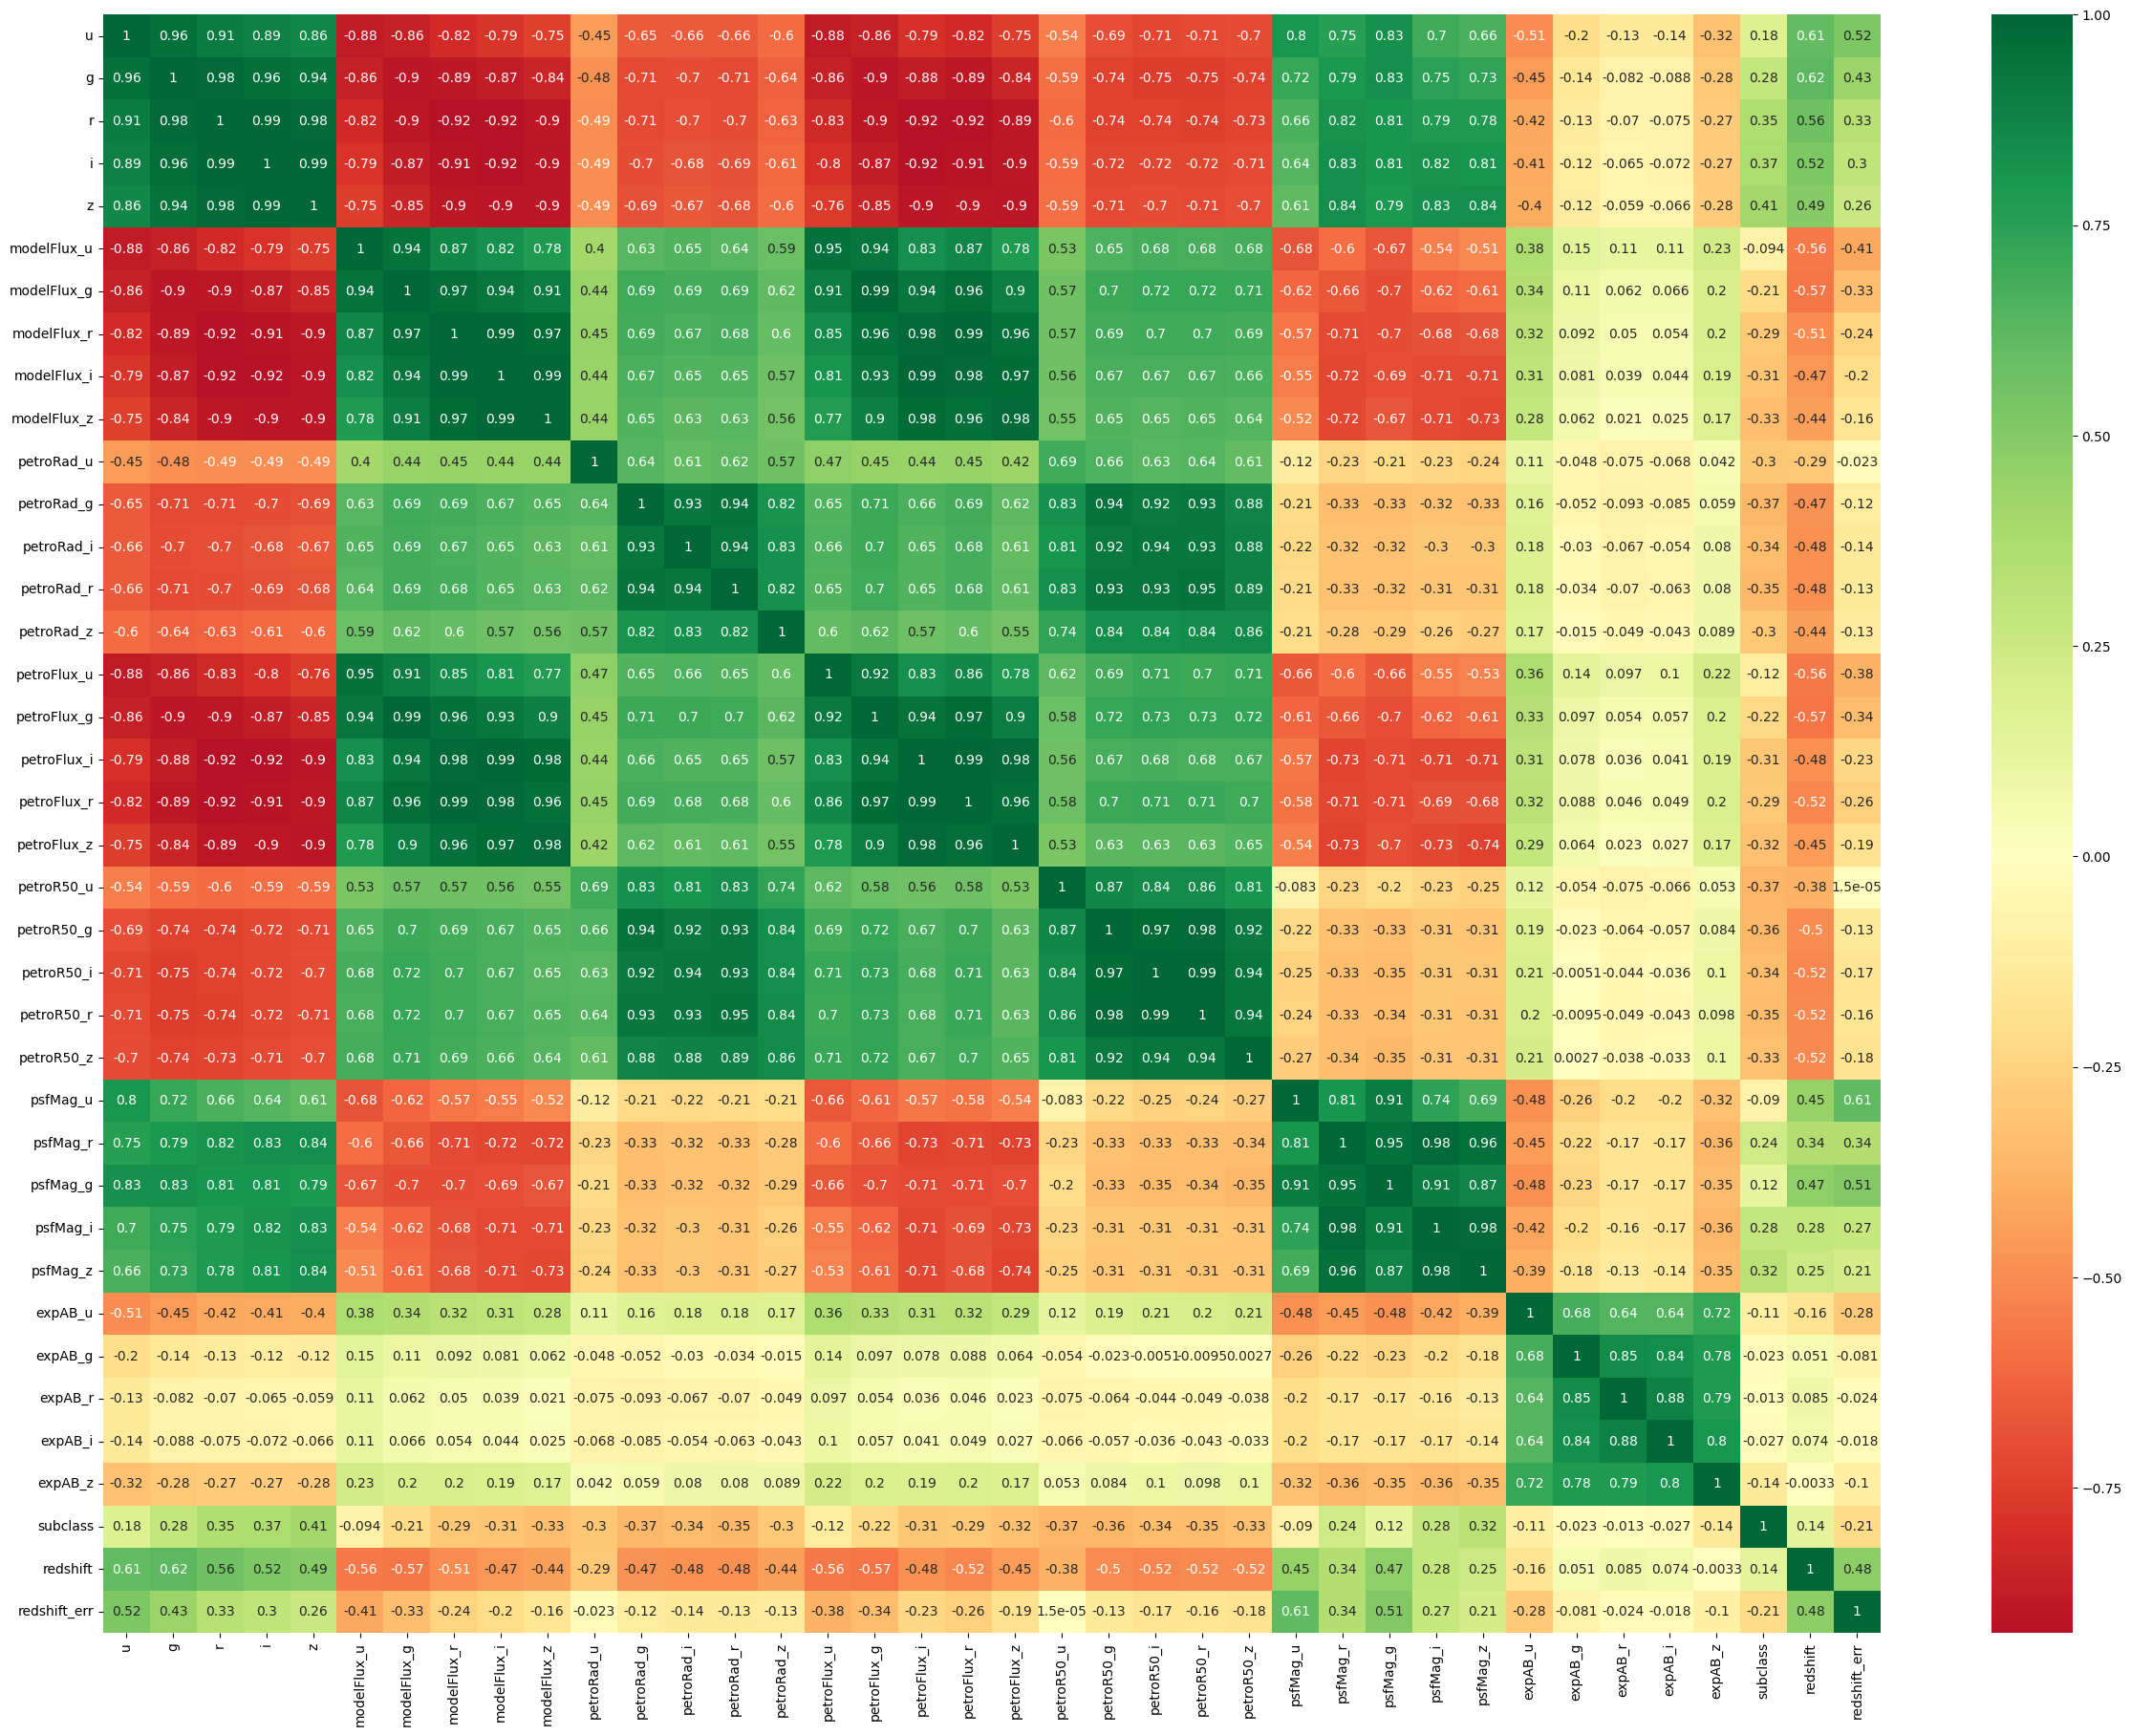

In [75]:
#Get the correlation coefficients
correlation_df = df.corr()
correlation_df
plt.figure(figsize=(30, 22))
p = sns.heatmap(data=correlation_df, annot=True, cmap='RdYlGn', center=0)


In [76]:
df.shape

(100000, 38)

In [77]:
x=df.drop(['subclass'],axis=1)

y=df['subclass']

In [80]:
# Selecting best Features using Select K Best
# We selected 10 features out of 43 using Select K Best algorithm to enhance the predictive power and reduce dimensionality in our dataset.
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif



selector=SelectKBest(score_func=f_classif,k=10)



X_selected=selector.fit_transform(x,y)



selected_features=x.columns[selector.get_support()]



print("selected features",selected_features)

selected features Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroR50_u',
       'petroR50_g', 'petroR50_i', 'petroR50_r'],
      dtype='object')


In [81]:
#We balanced the value counts in our dataset using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and improve the robustness of our machine learning model.
print(pd.Series(y).value_counts())

subclass
0.0    74993
1.0    25007
Name: count, dtype: int64


In [83]:
smote=SMOTE(random_state=42)

x_resampled,y_resampled=smote.fit_resample(x,y)

print(pd.Series(y_resampled).value_counts())

subclass
0.0    74993
1.0    74993
Name: count, dtype: int64


In [84]:
#Splitting data into train and test
df1=df[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z','subclass']]

x=df1[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z']]

y=df1["subclass"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [111]:
#using random forest for training
RF= RandomForestClassifier()


RF.fit(x_train,y_train)

RFtrain=RF.predict(x_train)

RFtest=RF.predict(x_test)

# print classification report,confusion matrix

print(confusion_matrix(RFtrain,y_train))

print(confusion_matrix(RFtest,y_test))

print(classification_report(RFtrain,y_train))

print(classification_report(RFtest,y_test))



[[59998    95]
 [    0 19907]]
[[13963  2134]
 [ 1032  2871]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60093
         1.0       1.00      1.00      1.00     19907

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     16097
         1.0       0.57      0.74      0.64      3903

    accuracy                           0.84     20000
   macro avg       0.75      0.80      0.77     20000
weighted avg       0.86      0.84      0.85     20000



In [112]:
print(accuracy_score(RFtrain,y_train))
print(accuracy_score(RFtest,y_test))

0.9988125
0.8417


In [113]:
import joblib
# Save the trained model
joblib.dump(RF, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [114]:
# Load the saved model
rf_model = joblib.load("random_forest_model.pkl")

# Predict on new data
new_predictions = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, new_predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8417


In [115]:
rf_model.predict([[17.67528,17.52775,104.25655,3.397512,3.424717,90.717547,1.613005,1.632243,1.548225,1.596137]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [116]:
from google.colab import files

files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>